In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
from fuzzywuzzy import process
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
import statsmodels.api as sm
import statsmodels.formula.api as smf


#LENDO E TRATANDO DADOS DA ELEIÇÃO DE 2018

In [232]:
df_eleicoes = pd.read_csv("dados_brutos/DadosEleicoes2018.csv", encoding='ISO-8859-1', sep=";")

#Foi necessário usar a especificação do encoding e do separador para poder importar os dados corretamente

In [233]:
df_eleicoes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17402 entries, 0 to 17401
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Ano de eleição  17402 non-null  int64 
 1   Município       17402 non-null  object
 2   UF              17402 non-null  object
 3   Região          17402 non-null  object
 4   Turno           17402 non-null  int64 
 5   Nome candidato  17402 non-null  object
 6   Cargo           17402 non-null  object
 7   Votos válidos   17402 non-null  int64 
 8   Votos nominais  17402 non-null  int64 
 9   Data de carga   17402 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.3+ MB


In [234]:
df_eleicoes.head()

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais,Data de carga
0,2018,IGUARAÇU,PR,SUL,2,JAIR MESSIAS BOLSONARO,Presidente,2696,1858,2023-03-31 10:03:12
1,2018,ABADIA DOS DOURADOS,MG,SUDESTE,2,ANTONIO AUGUSTO JUNHO ANASTASIA,Governador,3649,329,2023-03-31 10:03:12
2,2018,SÃO PAULO,SP,SUDESTE,2,MARCIO LUIZ FRANÇA GOMES,Governador,5840401,3393092,2023-03-31 10:03:12
3,2018,PIRACURUCA,PI,NORDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,16935,3782,2023-03-31 10:03:12
4,2018,BOM SUCESSO,MG,SUDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,9447,5548,2023-03-31 10:03:12


In [235]:
#A data da carga não me importa, então vou dropar a coluna

df_eleicoes = df_eleicoes.drop(columns=["Data de carga"])
df_eleicoes.head()

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais
0,2018,IGUARAÇU,PR,SUL,2,JAIR MESSIAS BOLSONARO,Presidente,2696,1858
1,2018,ABADIA DOS DOURADOS,MG,SUDESTE,2,ANTONIO AUGUSTO JUNHO ANASTASIA,Governador,3649,329
2,2018,SÃO PAULO,SP,SUDESTE,2,MARCIO LUIZ FRANÇA GOMES,Governador,5840401,3393092
3,2018,PIRACURUCA,PI,NORDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,16935,3782
4,2018,BOM SUCESSO,MG,SUDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,9447,5548


In [236]:
#Verificando se temos duplicados
df_eleicoes.duplicated().sum()

np.int64(0)

In [237]:
#Verificando se temos NaN, apesar de que verifiquei acima que as colunas todas aparecem todas com o mesmo número de Non-null
df_eleicoes.notna().sum()

Ano de eleição    17402
Município         17402
UF                17402
Região            17402
Turno             17402
Nome candidato    17402
Cargo             17402
Votos válidos     17402
Votos nominais    17402
dtype: int64

In [238]:
#Removendo linhas que tenham Governador especificado no Cargo (porque me interessam os valores de Presidente). Apliquei um filtro para manter apenas as linhas em que Cargo era != de Governador
df_eleicoes = df_eleicoes[df_eleicoes["Cargo"] != "Governador"]
df_eleicoes.head()


,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais
0,2018,IGUARAÇU,PR,SUL,2,JAIR MESSIAS BOLSONARO,Presidente,2696,1858
3,2018,PIRACURUCA,PI,NORDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,16935,3782
4,2018,BOM SUCESSO,MG,SUDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,9447,5548
5,2018,PORTO ALEGRE,RS,SUL,2,FERNANDO HADDAD,Presidente,768062,331419
6,2018,CHÃ GRANDE,PE,NORDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,12825,3750


In [239]:
#Verificando meu DataFrame final de eleições
df_eleicoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11416 entries, 0 to 17401
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Ano de eleição  11416 non-null  int64 
 1   Município       11416 non-null  object
 2   UF              11416 non-null  object
 3   Região          11416 non-null  object
 4   Turno           11416 non-null  int64 
 5   Nome candidato  11416 non-null  object
 6   Cargo           11416 non-null  object
 7   Votos válidos   11416 non-null  int64 
 8   Votos nominais  11416 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 891.9+ KB


In [240]:
#Conferindo novamente a inexistência de duplicados ou nulos
print(df_eleicoes.duplicated().sum())
print(df_eleicoes.notna().sum())

0
Ano de eleição    11416
Município         11416
UF                11416
Região            11416
Turno             11416
Nome candidato    11416
Cargo             11416
Votos válidos     11416
Votos nominais    11416
dtype: int64


In [241]:
#conferindo o número de valores
df_eleicoes.value_counts().sum()

np.int64(11416)

In [242]:
#Verificando os valores únicos, especialmente para verificar quantos municípios e estados eram listados
df_eleicoes.nunique()

Ano de eleição       1
Município         5425
UF                  28
Região               6
Turno                1
Nome candidato       2
Cargo                1
Votos válidos     4812
Votos nominais    6725
dtype: int64

In [243]:
#organizando os dados ordenando por Estado, depois município e depois por votos nominais
df_eleicoes = df_eleicoes.sort_values(by=["UF", "Município", "Votos nominais"])
df_eleicoes.head()


#Com isso foi possível perceber que cada município aparecia duas vezes no DataFrame, uma vez que o DataFrame traz uma linha para cada candidato votado

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais
13977,2018,ACRELÂNDIA,AC,NORTE,2,FERNANDO HADDAD,Presidente,6465,1300
17344,2018,ACRELÂNDIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,6465,5165
5211,2018,ASSIS BRASIL,AC,NORTE,2,FERNANDO HADDAD,Presidente,3993,1660
2808,2018,ASSIS BRASIL,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,3993,2333
10288,2018,BRASILÉIA,AC,NORTE,2,FERNANDO HADDAD,Presidente,11919,3208


In [244]:
#Com esse código, considerando a forma como o DataFrame ficou organizado acima, agrupei os dados por estado e município e para grupo criado selecionei a última linha, pegando com isso os últimos valores, uma vez que precisava do candidato mais votado na minha análise

df_eleicoes = df_eleicoes.groupby(["UF", "Município"]).tail(1)
df_eleicoes.shape

(5708, 9)

In [245]:
#Considerando que ainda tinha mais linhas do que o total de municípios brasileiros, verifiquei os dados e filtrei, excluindo aqueles referentes a votos no exterior, representados por Estado ZZ no DataFrame
df_eleicoes = df_eleicoes[df_eleicoes["UF"] != "ZZ"]
df_eleicoes.shape

(5570, 9)

In [246]:
#Como eu precisaria unificar 2 DataFrames pelo nome do município, para padronizar, tratei os nomes com o unidecode, que retira espaços, til e cedilha, por exemplo.
df_eleicoes['Município'] = df_eleicoes['Município'].apply(unidecode)
df_eleicoes.head()

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais
17344,2018,ACRELANDIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,6465,5165
2808,2018,ASSIS BRASIL,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,3993,2333
12270,2018,BRASILEIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,11919,8711
9035,2018,BUJARI,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,5950,4676
10024,2018,CAPIXABA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,4981,3895


In [247]:
#Considerando a possibilidade de nomes de municípios repetidos, e a inexistência de um código único entre od DataFrames, para ter certeza que cada município ficaria devidamente identificado, criei uma coluna mesclando nome de Estado e Município
df_eleicoes["Estado_Municipio"] = df_eleicoes["UF"] + "-" + df_eleicoes["Município"]
df_eleicoes.head()

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais,Estado_Municipio
17344,2018,ACRELANDIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,6465,5165,AC-ACRELANDIA
2808,2018,ASSIS BRASIL,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,3993,2333,AC-ASSIS BRASIL
12270,2018,BRASILEIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,11919,8711,AC-BRASILEIA
9035,2018,BUJARI,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,5950,4676,AC-BUJARI
10024,2018,CAPIXABA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,4981,3895,AC-CAPIXABA


In [248]:
#Após finalizar tudo o que era necessário nesse DF, salvei os dados tratados 
df_eleicoes.to_csv("dados_tratados/DadosEleicoes2018-Tratado.csv")

#LENDO E TRATANDO DADOS DAS VACINAS

In [249]:
df_vacinas = pd.read_csv("dados_brutos/DadosVacinas2015-2022.csv", encoding='ISO-8859-1', sep=";")

In [250]:
df_vacinas.head()

,Município,2015,2016,2017,2018,2019,2020,2021,2022,Total
0,110001 ALTA FLORESTA D\'OESTE,"62,04","48,97","82,70","124,85","99,72","82,20","68,12","114,11","84,60"
1,110002 ARIQUEMES,"112,03","104,25","107,29","100,24","98,20","82,25","84,38","112,61","99,82"
2,110003 CABIXI,"13,51","29,33","36,00","32,88","17,91","56,72","56,25","94,20","41,90"
3,110004 CACOAL,"135,95","114,15","128,46","125,34","109,09","87,47","97,38","125,51","114,66"
4,110005 CEREJEIRAS,"83,76","57,43","85,14","71,48","44,04","84,12","102,11","110,78","79,59"


In [251]:
df_vacinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  5571 non-null   object
 1   2015       5571 non-null   object
 2   2016       5571 non-null   object
 3   2017       5571 non-null   object
 4   2018       5571 non-null   object
 5   2019       5571 non-null   object
 6   2020       5571 non-null   object
 7   2021       5571 non-null   object
 8   2022       5571 non-null   object
 9    Total     5571 non-null   object
dtypes: object(10)
memory usage: 435.4+ KB


In [252]:
#O número de linhas não correspondia ao número de municípios, assim foi encontrada uma linha de total ao final do DF
df_vacinas.tail()

,Município,2015,2016,2017,2018,2019,2020,2021,2022,Total
5566,522205 VICENTINOPOLIS,"113,89","85,16","85,16","118,87","101,82","70,00","46,43","110,79","91,60"
5567,522220 VILA BOA,"25,33","12,86","35,71","25,42","37,70","42,62","74,00","113,73","42,66"
5568,522230 VILA PROPICIO,"45,45","70,69","98,28","97,92","106,06","78,79","40,85","90,57","76,95"
5569,530010 BRASILIA,"78,27","138,11","93,61","89,50","93,24","91,32","98,78","114,88","99,54"
5570,Total,"105,08","95,55","97,98","99,72","86,67","77,14","74,97","90,06","90,94"


In [253]:
#Essa linha foi dropada para deixar apenas as linhas referentes aos municípios
df_vacinas = df_vacinas.drop(5570, axis=0)

In [254]:
#Verificando se a linha sumiu
df_vacinas.tail()

,Município,2015,2016,2017,2018,2019,2020,2021,2022,Total
5565,522200 VIANOPOLIS,"115,85","101,08","101,08","130,18","102,04","94,90","113,78","103,49","107,38"
5566,522205 VICENTINOPOLIS,"113,89","85,16","85,16","118,87","101,82","70,00","46,43","110,79","91,60"
5567,522220 VILA BOA,"25,33","12,86","35,71","25,42","37,70","42,62","74,00","113,73","42,66"
5568,522230 VILA PROPICIO,"45,45","70,69","98,28","97,92","106,06","78,79","40,85","90,57","76,95"
5569,530010 BRASILIA,"78,27","138,11","93,61","89,50","93,24","91,32","98,78","114,88","99,54"


In [255]:
#verificando as infos
df_vacinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  5570 non-null   object
 1   2015       5570 non-null   object
 2   2016       5570 non-null   object
 3   2017       5570 non-null   object
 4   2018       5570 non-null   object
 5   2019       5570 non-null   object
 6   2020       5570 non-null   object
 7   2021       5570 non-null   object
 8   2022       5570 non-null   object
 9    Total     5570 non-null   object
dtypes: object(10)
memory usage: 435.3+ KB


In [256]:
#Passando as colunas de vacinação para numéricas, por estarem todas como string

colunas_para_numeros = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]

for coluna in colunas_para_numeros:
    df_vacinas[coluna] = df_vacinas[coluna].str.replace(",", ".").astype(float)

df_vacinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Município  5570 non-null   object 
 1   2015       5570 non-null   float64
 2   2016       5570 non-null   float64
 3   2017       5570 non-null   float64
 4   2018       5570 non-null   float64
 5   2019       5570 non-null   float64
 6   2020       5570 non-null   float64
 7   2021       5570 non-null   float64
 8   2022       5570 non-null   float64
 9    Total     5570 non-null   object 
dtypes: float64(8), object(2)
memory usage: 435.3+ KB


In [257]:
#verificando as colunas
df_vacinas.columns

Index(['Município', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', ' Total'],
      dtype='object')

In [258]:
#Removendo a coluna " Total" porque não me interesse na análise que farei
df_vacinas = df_vacinas.drop(columns=[" Total"])
df_vacinas.head()

,Município,2015,2016,2017,2018,2019,2020,2021,2022
0,110001 ALTA FLORESTA D\'OESTE,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11
1,110002 ARIQUEMES,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61
2,110003 CABIXI,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20
3,110004 CACOAL,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51
4,110005 CEREJEIRAS,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78


In [259]:
#Separando o nome do município do código do município que vêm unificados por padrão da importação do DataSUS
df_vacinas[['Código', 'Nome Município']] = df_vacinas['Município'].str.split(' ', n=1, expand=True)

# Exibindo as primeiras linhas do DataFrame para verificar o resultado
df_vacinas.head()

,Município,2015,2016,2017,2018,2019,2020,2021,2022,Código,Nome Município
0,110001 ALTA FLORESTA D\'OESTE,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11,110001,ALTA FLORESTA D\'OESTE
1,110002 ARIQUEMES,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61,110002,ARIQUEMES
2,110003 CABIXI,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20,110003,CABIXI
3,110004 CACOAL,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51,110004,CACOAL
4,110005 CEREJEIRAS,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78,110005,CEREJEIRAS


In [260]:
# Como alguns municípios tinham um barra como caractére, para evitar erros na hora de megear os dataframes, removi a barra invertida na coluna "Nome Município". Foi necessário usar \\ ao invés de só \ porque a barra invertida é um caracter especial no Python
df_vacinas["Nome Município"] = df_vacinas["Nome Município"].str.replace("\\", "")
df_vacinas.head()

,Município,2015,2016,2017,2018,2019,2020,2021,2022,Código,Nome Município
0,110001 ALTA FLORESTA D\'OESTE,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11,110001,ALTA FLORESTA D'OESTE
1,110002 ARIQUEMES,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61,110002,ARIQUEMES
2,110003 CABIXI,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20,110003,CABIXI
3,110004 CACOAL,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51,110004,CACOAL
4,110005 CEREJEIRAS,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78,110005,CEREJEIRAS


In [261]:
#Depois de fazer essa separação, a antiga coluna Município não me interessava mais, então dropei ela
df_vacinas = df_vacinas.drop(columns="Município")
df_vacinas.head()

,2015,2016,2017,2018,2019,2020,2021,2022,Código,Nome Município
0,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11,110001,ALTA FLORESTA D'OESTE
1,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61,110002,ARIQUEMES
2,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20,110003,CABIXI
3,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51,110004,CACOAL
4,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78,110005,CEREJEIRAS


In [262]:
#Após essas modificações reorganizei o DataFrame para a visualização ficar melhor

colunas_para_manter = ["Nome Município", "Código"]
nova_ordem = colunas_para_manter + [col for col in df_vacinas.columns if col not in colunas_para_manter]
df_vacinas = df_vacinas[nova_ordem]
df_vacinas.head()

,Nome Município,Código,2015,2016,2017,2018,2019,2020,2021,2022
0,ALTA FLORESTA D'OESTE,110001,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11
1,ARIQUEMES,110002,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61
2,CABIXI,110003,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20
3,CACOAL,110004,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51
4,CEREJEIRAS,110005,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78


In [263]:
#apliquei o unidecode nesses nomes de Município para garantir correspondência com o outro DataFrame
df_vacinas['Nome Município'] = df_vacinas['Nome Município'].apply(unidecode)
df_vacinas.sort_values(by="Nome Município")
df_vacinas.head(30)

,Nome Município,Código,2015,2016,2017,2018,2019,2020,2021,2022
0,ALTA FLORESTA D'OESTE,110001,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11
1,ARIQUEMES,110002,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61
2,CABIXI,110003,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20
3,CACOAL,110004,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51
4,CEREJEIRAS,110005,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78
5,COLORADO DO OESTE,110006,23.83,20.15,42.49,25.11,19.75,50.21,96.26,171.92
6,CORUMBIARA,110007,6.90,15.20,104.00,100.00,50.57,55.17,63.78,65.42
7,COSTA MARQUES,110008,103.42,64.42,65.17,110.33,131.48,84.26,68.67,100.53
8,ESPIGAO D'OESTE,110009,100.86,103.43,93.33,89.30,71.48,83.49,104.00,64.12
9,GUAJARA-MIRIM,110010,120.69,122.83,80.87,102.38,85.39,57.24,75.16,71.33


In [264]:
#O dataframe de vacinas não possuía uma coluna estado e, por padrão eu não consigo extrair isso do Tabnet do DataSus, então conferi se eu tinha municípios com nomes repetidos e, sim, eu tinha. Como o código do SUS não bate com o código do TSE eu precisava da informação do estado aqui.
df_vacinas["Nome Município"].value_counts()

Nome Município
BOM JESUS               5
SAO DOMINGOS            5
VERA CRUZ               4
SAO FRANCISCO           4
SANTA LUZIA             4
                       ..
CORACAO DE MARIA        1
CONTENDAS DO SINCORA    1
CONDEUBA                1
CONCEICAO DO JACUIPE    1
BRASILIA                1
Name: count, Length: 5290, dtype: int64

#TRATANDO O DF COM OS ESTADOS PARA PERMITIR UM MERGE DEPOIS

In [265]:
#Pelo mesmo sistema do Tabnet eu percebi que conseguia extrair um outro csv que consegue me trazer os estados como colunas.
df_estados = pd.read_csv("dados_brutos/VacinasEstado.csv", encoding='ISO-8859-1', sep=";")
df_estados.head()

,Município,RO,AC,AM,RR,PA,AP,TO,MA,PI,...,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,110001 ALTA FLORESTA D\'OESTE,"84,60",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"84,60"
1,110002 ARIQUEMES,"99,82",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"99,82"
2,110003 CABIXI,"41,90",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"41,90"
3,110004 CACOAL,"114,66",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"114,66"
4,110005 CEREJEIRAS,"79,59",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"79,59"


In [266]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5571 entries, 0 to 5570
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Município  5571 non-null   object
 1   RO         5571 non-null   object
 2   AC         5571 non-null   object
 3   AM         5571 non-null   object
 4   RR         5571 non-null   object
 5   PA         5571 non-null   object
 6   AP         5571 non-null   object
 7   TO         5571 non-null   object
 8   MA         5571 non-null   object
 9   PI         5571 non-null   object
 10  CE         5571 non-null   object
 11  RN         5571 non-null   object
 12  PB         5571 non-null   object
 13  PE         5571 non-null   object
 14  AL         5571 non-null   object
 15  SE         5571 non-null   object
 16  BA         5571 non-null   object
 17  MG         5571 non-null   object
 18  ES         5571 non-null   object
 19  RJ         5571 non-null   object
 20  SP         5571 non-null   obj

In [267]:
#Essa linha do total foi dropada para deixar apenas as linhas referentes aos municípios como no outro DF das vacinas
df_estados= df_estados.drop(5570, axis=0)

In [268]:
#Aqui apliquei os mesmos tratamentos que apliquei no DF de vacinas, uma vez que vinha da mesma fonte, separando município e código, padronizando com o unidecode, tirando a barra que estava sobrando etc.
df_estados[['Código', 'Nome Município']] = df_estados['Município'].str.split(' ', n=1, expand=True)
df_estados['Nome Município'] = df_estados['Nome Município'].apply(unidecode)
df_estados["Nome Município"] = df_estados["Nome Município"].str.replace("\\", "")
# Exibir as primeiras linhas do DataFrame para verificar o resultado
df_estados.head()

,Município,RO,AC,AM,RR,PA,AP,TO,MA,PI,...,PR,SC,RS,MS,MT,GO,DF,Total,Código,Nome Município
0,110001 ALTA FLORESTA D\'OESTE,"84,60",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"84,60",110001,ALTA FLORESTA D'OESTE
1,110002 ARIQUEMES,"99,82",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"99,82",110002,ARIQUEMES
2,110003 CABIXI,"41,90",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"41,90",110003,CABIXI
3,110004 CACOAL,"114,66",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"114,66",110004,CACOAL
4,110005 CEREJEIRAS,"79,59",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,"79,59",110005,CEREJEIRAS


In [269]:
#Aqui reorganizei o DataFrame das vacinas por Estados

colunas_para_manter = ["Nome Município", "Código"]
nova_ordem = colunas_para_manter + [col for col in df_estados.columns if col not in colunas_para_manter]
df_estados = df_estados[nova_ordem]
df_estados = df_estados.drop(columns="Município")
df_estados.head()

,Nome Município,Código,RO,AC,AM,RR,PA,AP,TO,MA,...,RJ,SP,PR,SC,RS,MS,MT,GO,DF,Total
0,ALTA FLORESTA D'OESTE,110001,"84,60",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"84,60"
1,ARIQUEMES,110002,"99,82",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"99,82"
2,CABIXI,110003,"41,90",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"41,90"
3,CACOAL,110004,"114,66",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"114,66"
4,CEREJEIRAS,110005,"79,59",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"79,59"


In [270]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nome Município  5570 non-null   object
 1   Código          5570 non-null   object
 2   RO              5570 non-null   object
 3   AC              5570 non-null   object
 4   AM              5570 non-null   object
 5   RR              5570 non-null   object
 6   PA              5570 non-null   object
 7   AP              5570 non-null   object
 8   TO              5570 non-null   object
 9   MA              5570 non-null   object
 10  PI              5570 non-null   object
 11  CE              5570 non-null   object
 12  RN              5570 non-null   object
 13  PB              5570 non-null   object
 14  PE              5570 non-null   object
 15  AL              5570 non-null   object
 16  SE              5570 non-null   object
 17  BA              5570 non-null   object
 18  MG      

In [271]:
df_estados.columns

Index(['Nome Município', 'Código', 'RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ',
       'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF', ' Total'],
      dtype='object')

In [272]:
#Aqui passei as colunas dos estados para numéricas por estarem como strings, isso porque pela organização do DataFrame sempre que a coluna de Estado fosse igual a zero, indicava que aquele município não pertencia àquele Estado

colunas_estados_para_numeros = ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ',
       'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']

for coluna in colunas_estados_para_numeros:
    df_estados[coluna] = df_estados[coluna].str.replace(",", ".").astype(float)

df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nome Município  5570 non-null   object 
 1   Código          5570 non-null   object 
 2   RO              5570 non-null   float64
 3   AC              5570 non-null   float64
 4   AM              5570 non-null   float64
 5   RR              5570 non-null   float64
 6   PA              5570 non-null   float64
 7   AP              5570 non-null   float64
 8   TO              5570 non-null   float64
 9   MA              5570 non-null   float64
 10  PI              5570 non-null   float64
 11  CE              5570 non-null   float64
 12  RN              5570 non-null   float64
 13  PB              5570 non-null   float64
 14  PE              5570 non-null   float64
 15  AL              5570 non-null   float64
 16  SE              5570 non-null   float64
 17  BA              5570 non-null   f

In [273]:
# Aqui, com a ajuda da IA generativa criei um script para verificar quando a informação da coluna era diferente de 0 e retornar em uma nova coluna a informação do Estado, com isso, consegui um DataFrame com a informação do Estado para cada muinicípio
lista_estados = ['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA',
                 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA', 'MG',
                 'ES', 'RJ', 'SP', 'PR', 'SC', 'RS', 'MS', 'MT', 'GO', 'DF']

# Função para buscar o estado baseado no valor diferente de zero
def buscar_estado(row):
    for estado in lista_estados:
        if row[estado] != 0:
            return estado
    return None

# Aplicar a função para criar uma nova coluna ("Estado") com o estado correspondente obtido pela função acima
df_estados['Estado'] = df_estados.apply(buscar_estado, axis=1)

# Exibir as primeiras 20 linhas do DataFrame atualizado para conferir se deu certo
df_estados.head(20)

,Nome Município,Código,RO,AC,AM,RR,PA,AP,TO,MA,...,SP,PR,SC,RS,MS,MT,GO,DF,Total,Estado
0,ALTA FLORESTA D'OESTE,110001,84.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"84,60",RO
1,ARIQUEMES,110002,99.82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"99,82",RO
2,CABIXI,110003,41.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"41,90",RO
3,CACOAL,110004,114.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"114,66",RO
4,CEREJEIRAS,110005,79.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"79,59",RO
5,COLORADO DO OESTE,110006,52.54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"52,54",RO
6,CORUMBIARA,110007,59.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"59,04",RO
7,COSTA MARQUES,110008,89.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"89,32",RO
8,ESPIGAO D'OESTE,110009,88.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"88,41",RO
9,GUAJARA-MIRIM,110010,90.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"90,05",RO


In [274]:
# Agora foi só mergear essa informação no DataFrame de vacinas, uma vez que ambos os DFs possuíam a coluna de código do Município

df_vacinas = pd.merge(df_vacinas, df_estados[['Código', 'Estado']], on='Código', how='left')

# Exibindo o DataFrame resultante
df_vacinas.head(20)

,Nome Município,Código,2015,2016,2017,2018,2019,2020,2021,2022,Estado
0,ALTA FLORESTA D'OESTE,110001,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11,RO
1,ARIQUEMES,110002,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61,RO
2,CABIXI,110003,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20,RO
3,CACOAL,110004,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51,RO
4,CEREJEIRAS,110005,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78,RO
5,COLORADO DO OESTE,110006,23.83,20.15,42.49,25.11,19.75,50.21,96.26,171.92,RO
6,CORUMBIARA,110007,6.90,15.20,104.00,100.00,50.57,55.17,63.78,65.42,RO
7,COSTA MARQUES,110008,103.42,64.42,65.17,110.33,131.48,84.26,68.67,100.53,RO
8,ESPIGAO D'OESTE,110009,100.86,103.43,93.33,89.30,71.48,83.49,104.00,64.12,RO
9,GUAJARA-MIRIM,110010,120.69,122.83,80.87,102.38,85.39,57.24,75.16,71.33,RO


In [275]:
df_vacinas["Estado_Municipio"] = df_vacinas["Estado"] + "-" + df_vacinas["Nome Município"]
df_vacinas.head()

,Nome Município,Código,2015,2016,2017,2018,2019,2020,2021,2022,Estado,Estado_Municipio
0,ALTA FLORESTA D'OESTE,110001,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11,RO,RO-ALTA FLORESTA D'OESTE
1,ARIQUEMES,110002,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61,RO,RO-ARIQUEMES
2,CABIXI,110003,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20,RO,RO-CABIXI
3,CACOAL,110004,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51,RO,RO-CACOAL
4,CEREJEIRAS,110005,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78,RO,RO-CEREJEIRAS


In [276]:
#Com isso finalizei o DF de vacinas por município e o salvei como um DF tratado
df_vacinas.to_csv("dados_tratados/DadosVacinas2015-2022-Tratado.csv", index=False)
df_vacinas.head(50)

,Nome Município,Código,2015,2016,2017,2018,2019,2020,2021,2022,Estado,Estado_Municipio
0,ALTA FLORESTA D'OESTE,110001,62.04,48.97,82.70,124.85,99.72,82.20,68.12,114.11,RO,RO-ALTA FLORESTA D'OESTE
1,ARIQUEMES,110002,112.03,104.25,107.29,100.24,98.20,82.25,84.38,112.61,RO,RO-ARIQUEMES
2,CABIXI,110003,13.51,29.33,36.00,32.88,17.91,56.72,56.25,94.20,RO,RO-CABIXI
3,CACOAL,110004,135.95,114.15,128.46,125.34,109.09,87.47,97.38,125.51,RO,RO-CACOAL
4,CEREJEIRAS,110005,83.76,57.43,85.14,71.48,44.04,84.12,102.11,110.78,RO,RO-CEREJEIRAS
5,COLORADO DO OESTE,110006,23.83,20.15,42.49,25.11,19.75,50.21,96.26,171.92,RO,RO-COLORADO DO OESTE
6,CORUMBIARA,110007,6.90,15.20,104.00,100.00,50.57,55.17,63.78,65.42,RO,RO-CORUMBIARA
7,COSTA MARQUES,110008,103.42,64.42,65.17,110.33,131.48,84.26,68.67,100.53,RO,RO-COSTA MARQUES
8,ESPIGAO D'OESTE,110009,100.86,103.43,93.33,89.30,71.48,83.49,104.00,64.12,RO,RO-ESPIGAO D'OESTE
9,GUAJARA-MIRIM,110010,120.69,122.83,80.87,102.38,85.39,57.24,75.16,71.33,RO,RO-GUAJARA-MIRIM


Agora temos os dataframes com os valores tratados e com uma coluna que permite a correlação entre eles (coluna Estado_Municipio).
Para facilitar a construção do DataFrame no Tableau, vamos deixar as informações unificadas.

In [277]:
#verificando as informacoes do df_eleicoes
df_eleicoes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 17344 to 13974
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ano de eleição    5570 non-null   int64 
 1   Município         5570 non-null   object
 2   UF                5570 non-null   object
 3   Região            5570 non-null   object
 4   Turno             5570 non-null   int64 
 5   Nome candidato    5570 non-null   object
 6   Cargo             5570 non-null   object
 7   Votos válidos     5570 non-null   int64 
 8   Votos nominais    5570 non-null   int64 
 9   Estado_Municipio  5570 non-null   object
dtypes: int64(4), object(6)
memory usage: 478.7+ KB


In [278]:
#verificando as informacoes do df_vacinas
df_vacinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Nome Município    5570 non-null   object 
 1   Código            5570 non-null   object 
 2   2015              5570 non-null   float64
 3   2016              5570 non-null   float64
 4   2017              5570 non-null   float64
 5   2018              5570 non-null   float64
 6   2019              5570 non-null   float64
 7   2020              5570 non-null   float64
 8   2021              5570 non-null   float64
 9   2022              5570 non-null   float64
 10  Estado            5570 non-null   object 
 11  Estado_Municipio  5570 non-null   object 
dtypes: float64(8), object(4)
memory usage: 522.3+ KB


In [279]:
#combinando os DataFrames
df_combinado = pd.merge(df_eleicoes, df_vacinas, on="Estado_Municipio", how="inner")
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5548 entries, 0 to 5547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ano de eleição    5548 non-null   int64  
 1   Município         5548 non-null   object 
 2   UF                5548 non-null   object 
 3   Região            5548 non-null   object 
 4   Turno             5548 non-null   int64  
 5   Nome candidato    5548 non-null   object 
 6   Cargo             5548 non-null   object 
 7   Votos válidos     5548 non-null   int64  
 8   Votos nominais    5548 non-null   int64  
 9   Estado_Municipio  5548 non-null   object 
 10  Nome Município    5548 non-null   object 
 11  Código            5548 non-null   object 
 12  2015              5548 non-null   float64
 13  2016              5548 non-null   float64
 14  2017              5548 non-null   float64
 15  2018              5548 non-null   float64
 16  2019              5548 non-null   float64


Após essa combinação verifiquei que o número de séries diminuiu. Onde deveria ter 5570 municípios passamos a ter apenas 5548 informações.
Com a ajuda da IA generativa, um script simples permitiu verificar quais eram os valores que não estavam sendo encontrados no outro dataframe do merge.

In [280]:
eleicoes_nao_encontrados = df_eleicoes[~df_eleicoes["Estado_Municipio"].isin(df_vacinas["Estado_Municipio"])]

# Exibir as linhas que estão faltando no df_combinado
eleicoes_nao_encontrados.head(30)


,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais,Estado_Municipio
7380,2018,CAMACA,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,11588,7323,BA-CAMACA
11345,2018,MUQUEM DO SAO FRANCISCO,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,6023,4952,BA-MUQUEM DO SAO FRANCISCO
106,2018,QUINJINGUE,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,14394,11907,BA-QUINJINGUE
1737,2018,SANTA TEREZINHA,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,5571,4715,BA-SANTA TEREZINHA
16920,2018,ITAPAJE,CE,NORDESTE,2,FERNANDO HADDAD,Presidente,28365,20248,CE-ITAPAJE
7381,2018,OLHOS D'AGUA,MG,SUDESTE,2,FERNANDO HADDAD,Presidente,3095,2387,MG-OLHOS D'AGUA
1961,2018,PASSA VINTE,MG,SUDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,1424,791,MG-PASSA VINTE
16625,2018,PINGO D'AGUA,MG,SUDESTE,2,FERNANDO HADDAD,Presidente,2412,1388,MG-PINGO D'AGUA
6560,2018,SEM PEIXE,MG,SUDESTE,2,FERNANDO HADDAD,Presidente,1786,1213,MG-SEM PEIXE
9945,2018,POXOREU,MT,CENTRO-OESTE,2,FERNANDO HADDAD,Presidente,8004,4094,MT-POXOREU


In [281]:
#Invertendo a lógica de cima, fiz o mesmo para ver o que não batia no outro DataFrame

vacinas_nao_encontrados = df_vacinas[~df_vacinas["Estado_Municipio"].isin(df_eleicoes["Estado_Municipio"])]

# Exibir as linhas que estão faltando no df_combinado
vacinas_nao_encontrados.head(30)


,Nome Município,Código,2015,2016,2017,2018,2019,2020,2021,2022,Estado,Estado_Municipio
8,ESPIGAO D'OESTE,110009,100.86,103.43,93.33,89.30,71.48,83.49,104.00,64.12,RO,RO-ESPIGAO D'OESTE
24,ALVORADA D'OESTE,110034,92.27,95.65,69.02,88.55,93.26,76.97,40.98,85.71,RO,RO-ALVORADA D'OESTE
259,SANTA IZABEL DO PARA,150650,36.54,28.66,38.59,71.39,51.46,46.46,67.77,94.68,PA,PA-SANTA IZABEL DO PARA
977,ITAPAGE,230630,99.72,102.84,141.55,106.70,112.05,123.41,42.44,145.37,CE,CE-ITAPAGE
1076,ACU,240020,92.34,61.75,64.63,59.79,94.21,82.91,77.93,115.59,RN,RN-ACU
1087,AUGUSTO SEVERO,240130,81.03,35.29,47.06,66.67,82.52,67.96,62.64,197.56,RN,RN-AUGUSTO SEVERO
1133,JANUARIO CICCO,240530,8.40,0.00,54.55,74.19,15.28,11.11,20.81,47.77,RN,RN-JANUARIO CICCO
1166,OLHO-D'AGUA DO BORGES,240840,100.00,23.08,53.85,165.00,97.22,102.78,136.11,170.00,RN,RN-OLHO-D'AGUA DO BORGES
1482,BELEM DE SAO FRANCISCO,260160,41.99,49.29,89.24,81.60,96.13,86.45,79.93,122.90,PE,PE-BELEM DE SAO FRANCISCO
1775,GRACHO CARDOSO,280260,96.39,129.41,52.94,50.00,77.50,40.00,112.16,80.95,SE,SE-GRACHO CARDOSO


Percebi que eram pequenas alterações na grafia dos nomes (em um lugar com ~ em outro com N, em um lugar com SS no outro com Ç). Pesquisando, encontrei um algorítimo fuzzywuzzy que permite essa juncao por proximidade.
Para não correr o risco de fazer um merge errado nos valores que já deram certo, peguei apenas os dataframes resultantes da comparação, sendo o eleicoes_nao_encontrados e o vacinas_nao_encontrados.

In [282]:
pip install fuzzywuzzy python-Levenshtein pandas


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [283]:
#Aqui usei a IA generativa para auxiliar na construção desse código e criar uma função para encontrar correspondências aproximadas

def merge_approximate(eleicoes_df, vacinas_df, column_name, threshold=50):
    # Cria uma lista para armazenar as correspondências
    matches = []
    
    # Iterar sobre cada município em eleicoes_df
    for municipio in eleicoes_df[column_name]:
        # Encontra o município mais próximo em vacinas_df
        match = process.extractOne(municipio, vacinas_df[column_name], score_cutoff=threshold)
        
        # Se houver uma correspondência válida, armazena os resultados
        if match:  # Se match não for None
            # match é uma tupla com (nome do município correspondente, score)
            municipio_vacinas = match[0]  # Nome do município correspondente
            score = match[1]  # Score de similaridade
            matches.append((municipio, municipio_vacinas, score))
    
    # Cria um DataFrame a partir da lista de correspondências
    match_df = pd.DataFrame(matches, columns=[f'{column_name}_eleicoes', f'{column_name}_vacinas', 'Score'])
    
    return match_df

# Chamar a função para fazer o merge aproximado
resultado_merge = merge_approximate(eleicoes_nao_encontrados, vacinas_nao_encontrados, 'Estado_Municipio', threshold=80)

# Exibir as primeiras 30 linhas do DataFrame resultante
resultado_merge.head(30)


,Estado_Municipio_eleicoes,Estado_Municipio_vacinas,Score
0,BA-CAMACA,BA-CAMACAN,95
1,BA-MUQUEM DO SAO FRANCISCO,BA-MUQUEM DE SAO FRANCISCO,96
2,BA-QUINJINGUE,BA-QUIJINGUE,96
3,BA-SANTA TEREZINHA,BA-SANTA TERESINHA,94
4,CE-ITAPAJE,CE-ITAPAGE,90
5,MG-OLHOS D'AGUA,MG-OLHOS-D'AGUA,100
6,MG-PASSA VINTE,MG-PASSA-VINTE,100
7,MG-PINGO D'AGUA,MG-PINGO-D'AGUA,100
8,MG-SEM PEIXE,MG-SEM-PEIXE,100
9,MT-POXOREU,MT-POXOREO,90


Com esse resultado do fuzzywuzzy percebi que 2 municípios do RN possuíam "dois nomes", sendo Boa Saúde = Januario Cicco e Campo Grande = Augusto Severo. Pesquisei e confirmei que tratavam-se de nomes informais ou nomes antigos.
Eles aparecem em ordem oposta nos dataframes resultantes, de modo que eu não poderia só por um index para mergear (seria a forma mais fácil de resolver)

In [284]:
eleicoes_nao_encontrados["Estado_Municipio"].unique()

array(['BA-CAMACA', 'BA-MUQUEM DO SAO FRANCISCO', 'BA-QUINJINGUE',
       'BA-SANTA TEREZINHA', 'CE-ITAPAJE', "MG-OLHOS D'AGUA",
       'MG-PASSA VINTE', "MG-PINGO D'AGUA", 'MG-SEM PEIXE', 'MT-POXOREU',
       'PA-SANTA ISABEL DO PARA', 'PE-BELEM DO SAO FRANCISCO', 'RN-ASSU',
       'RN-BOA SAUDE', 'RN-CAMPO GRANDE', "RN-OLHO D'AGUA DO BORGES",
       'RO-ALVORADA DO OESTE', 'RO-ESPIGAO DO OESTE', 'SC-GRAO-PARA',
       'SE-GRACCHO CARDOSO', 'SP-BIRITIBA MIRIM', 'SP-FLORINEA'],
      dtype=object)

In [285]:
vacinas_nao_encontrados["Estado_Municipio"].unique()

array(["RO-ESPIGAO D'OESTE", "RO-ALVORADA D'OESTE",
       'PA-SANTA IZABEL DO PARA', 'CE-ITAPAGE', 'RN-ACU',
       'RN-AUGUSTO SEVERO', 'RN-JANUARIO CICCO',
       "RN-OLHO-D'AGUA DO BORGES", 'PE-BELEM DE SAO FRANCISCO',
       'SE-GRACHO CARDOSO', 'BA-CAMACAN', 'BA-MUQUEM DE SAO FRANCISCO',
       'BA-QUIJINGUE', 'BA-SANTA TERESINHA', "MG-OLHOS-D'AGUA",
       'MG-PASSA-VINTE', "MG-PINGO-D'AGUA", 'MG-SEM-PEIXE',
       'SP-BIRITIBA-MIRIM', 'SP-FLORINIA', 'SC-GRAO PARA', 'MT-POXOREO'],
      dtype=object)

In [286]:
#Criei um código para substituir esses nomes nos DataFrames dos "excluídos"

replace_dict = {
    'BA-CAMACAN': 'BA-CAMACA',
    'BA-MUQUEM DE SAO FRANCISCO':'BA-MUQUEM DO SAO FRANCISCO',
    'BA-QUIJINGUE': 'BA-QUINJINGUE',
    'BA-SANTA TERESINHA':'BA-SANTA TEREZINHA',
    'CE-ITAPAGE': 'CE-ITAPAJE',
    'MG-OLHOS-D\'AGUA': "MG-OLHOS D'AGUA",
    'MG-PASSA-VINTE': 'MG-PASSA VINTE',
    'MG-PINGO-D\'AGUA': "MG-PINGO D'AGUA",
    'MG-SEM-PEIXE': 'MG-SEM PEIXE',
    'MT-POXOREO': 'MT-POXOREU',
    'PA-SANTA IZABEL DO PARA': 'PA-SANTA ISABEL DO PARA',
    'PE-BELEM DE SAO FRANCISCO':'PE-BELEM DO SAO FRANCISCO',
    'RN-ACU': 'RN-ASSU',
    'RN-AUGUSTO SEVERO': 'RN-CAMPO GRANDE',  # Considerando que CAMPO GRANDE é a correspondência correta
    'RN-JANUARIO CICCO': 'RN-BOA SAUDE',    # Considerando que BOA SAUDE é a correspondência correta
    "RN-OLHO-D'AGUA DO BORGES":"RN-OLHO D'AGUA DO BORGES",
    'RO-ALVORADA D\'OESTE': 'RO-ALVORADA DO OESTE',
    'RO-ESPIGAO D\'OESTE': 'RO-ESPIGAO DO OESTE',
    'SC-GRAO PARA': 'SC-GRAO-PARA',
    'SE-GRACHO CARDOSO': 'SE-GRACCHO CARDOSO',
    'SP-BIRITIBA-MIRIM': 'SP-BIRITIBA MIRIM',
    'SP-FLORINIA':'SP-FLORINEA'
}

# Depois disso apliquei o replace no DataFrame de vacinas
vacinas_nao_encontrados['Estado_Municipio'] = vacinas_nao_encontrados['Estado_Municipio'].replace(replace_dict)

# Aqui fiz o inner join lentre ambos
df_nome_ajustado = pd.merge(eleicoes_nao_encontrados, vacinas_nao_encontrados, on="Estado_Municipio", how="inner")
df_nome_ajustado.head(30)

/var/folders/kq/wv1bddkn1plgr7f5w53khhv80000gn/T/ipykernel_92813/628417985.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacinas_nao_encontrados['Estado_Municipio'] = vacinas_nao_encontrados['Estado_Municipio'].replace(replace_dict)


,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais,Estado_Municipio,...,Código,2015,2016,2017,2018,2019,2020,2021,2022,Estado
0,2018,CAMACA,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,11588,7323,BA-CAMACA,...,290560,112.30,85.47,105.67,100.53,84.14,66.40,101.19,120.58,BA
1,2018,MUQUEM DO SAO FRANCISCO,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,6023,4952,BA-MUQUEM DO SAO FRANCISCO,...,292225,105.00,78.49,120.35,127.88,152.76,73.62,69.23,91.53,BA
2,2018,QUINJINGUE,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,14394,11907,BA-QUINJINGUE,...,292590,91.00,110.78,120.59,91.29,114.05,72.18,57.31,101.99,BA
3,2018,SANTA TEREZINHA,BA,NORDESTE,2,FERNANDO HADDAD,Presidente,5571,4715,BA-SANTA TEREZINHA,...,292850,74.10,65.32,58.87,92.79,84.26,148.15,64.22,105.41,BA
4,2018,ITAPAJE,CE,NORDESTE,2,FERNANDO HADDAD,Presidente,28365,20248,CE-ITAPAJE,...,230630,99.72,102.84,141.55,106.70,112.05,123.41,42.44,145.37,CE
5,2018,OLHOS D'AGUA,MG,SUDESTE,2,FERNANDO HADDAD,Presidente,3095,2387,MG-OLHOS D'AGUA,...,314545,14.12,1.35,6.76,27.14,24.64,5.80,12.20,6.82,MG
6,2018,PASSA VINTE,MG,SUDESTE,2,JAIR MESSIAS BOLSONARO,Presidente,1424,791,MG-PASSA VINTE,...,314780,120.00,44.00,92.00,92.31,52.38,66.67,90.91,95.00,MG
7,2018,PINGO D'AGUA,MG,SUDESTE,2,FERNANDO HADDAD,Presidente,2412,1388,MG-PINGO D'AGUA,...,315053,107.94,139.58,150.00,112.50,86.36,127.27,113.56,75.00,MG
8,2018,SEM PEIXE,MG,SUDESTE,2,FERNANDO HADDAD,Presidente,1786,1213,MG-SEM PEIXE,...,316556,62.50,105.00,115.00,61.11,81.82,118.18,100.00,121.05,MG
9,2018,POXOREU,MT,CENTRO-OESTE,2,FERNANDO HADDAD,Presidente,8004,4094,MT-POXOREU,...,510700,80.49,67.06,85.32,88.50,85.31,75.51,37.64,98.45,MT


In [287]:
#Fiz um head para conferir se as colunas estavam correspondendo
df_combinado.head()

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais,Estado_Municipio,...,Código,2015,2016,2017,2018,2019,2020,2021,2022,Estado
0,2018,ACRELANDIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,6465,5165,AC-ACRELANDIA,...,120001,39.30,10.82,32.46,38.29,36.72,35.16,44.75,37.55,AC
1,2018,ASSIS BRASIL,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,3993,2333,AC-ASSIS BRASIL,...,120005,46.67,53.37,94.82,108.95,79.84,52.42,65.41,86.98,AC
2,2018,BRASILEIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,11919,8711,AC-BRASILEIA,...,120010,108.52,69.10,82.27,97.76,86.67,71.23,51.30,80.27,AC
3,2018,BUJARI,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,5950,4676,AC-BUJARI,...,120013,107.92,58.68,113.64,65.73,24.43,15.64,29.18,87.55,AC
4,2018,CAPIXABA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,4981,3895,AC-CAPIXABA,...,120017,112.50,64.53,29.06,29.38,20.16,20.58,44.70,41.58,AC


In [288]:
# Depois de confirmar, juntei os DataFrames verticalmente
df_combinado = pd.concat([df_combinado, df_nome_ajustado], ignore_index=True, sort=False)
df_combinado = df_combinado.drop(columns=["Nome Município", "Estado"])


df_combinado.info()

#Fiz um info para confirmar se tudo tinha o tanto de município que precisava ter e se os tyoes estavam corretos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ano de eleição    5570 non-null   int64  
 1   Município         5570 non-null   object 
 2   UF                5570 non-null   object 
 3   Região            5570 non-null   object 
 4   Turno             5570 non-null   int64  
 5   Nome candidato    5570 non-null   object 
 6   Cargo             5570 non-null   object 
 7   Votos válidos     5570 non-null   int64  
 8   Votos nominais    5570 non-null   int64  
 9   Estado_Municipio  5570 non-null   object 
 10  Código            5570 non-null   object 
 11  2015              5570 non-null   float64
 12  2016              5570 non-null   float64
 13  2017              5570 non-null   float64
 14  2018              5570 non-null   float64
 15  2019              5570 non-null   float64
 16  2020              5570 non-null   float64


In [289]:
#Ajustei o número de algumas colunas para ficarem mais claras
df_combinado = df_combinado.rename(columns={"Código": "Código SUS"})

df_combinado.head()

,Ano de eleição,Município,UF,Região,Turno,Nome candidato,Cargo,Votos válidos,Votos nominais,Estado_Municipio,Código SUS,2015,2016,2017,2018,2019,2020,2021,2022
0,2018,ACRELANDIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,6465,5165,AC-ACRELANDIA,120001,39.30,10.82,32.46,38.29,36.72,35.16,44.75,37.55
1,2018,ASSIS BRASIL,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,3993,2333,AC-ASSIS BRASIL,120005,46.67,53.37,94.82,108.95,79.84,52.42,65.41,86.98
2,2018,BRASILEIA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,11919,8711,AC-BRASILEIA,120010,108.52,69.10,82.27,97.76,86.67,71.23,51.30,80.27
3,2018,BUJARI,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,5950,4676,AC-BUJARI,120013,107.92,58.68,113.64,65.73,24.43,15.64,29.18,87.55
4,2018,CAPIXABA,AC,NORTE,2,JAIR MESSIAS BOLSONARO,Presidente,4981,3895,AC-CAPIXABA,120017,112.50,64.53,29.06,29.38,20.16,20.58,44.70,41.58


In [290]:
#Dropeias colunas turno e cargo por não fazerem mais sentido de serem mantidas

df_combinado = df_combinado.drop(columns=["Turno", "Cargo"])
df_combinado.head()

,Ano de eleição,Município,UF,Região,Nome candidato,Votos válidos,Votos nominais,Estado_Municipio,Código SUS,2015,2016,2017,2018,2019,2020,2021,2022
0,2018,ACRELANDIA,AC,NORTE,JAIR MESSIAS BOLSONARO,6465,5165,AC-ACRELANDIA,120001,39.30,10.82,32.46,38.29,36.72,35.16,44.75,37.55
1,2018,ASSIS BRASIL,AC,NORTE,JAIR MESSIAS BOLSONARO,3993,2333,AC-ASSIS BRASIL,120005,46.67,53.37,94.82,108.95,79.84,52.42,65.41,86.98
2,2018,BRASILEIA,AC,NORTE,JAIR MESSIAS BOLSONARO,11919,8711,AC-BRASILEIA,120010,108.52,69.10,82.27,97.76,86.67,71.23,51.30,80.27
3,2018,BUJARI,AC,NORTE,JAIR MESSIAS BOLSONARO,5950,4676,AC-BUJARI,120013,107.92,58.68,113.64,65.73,24.43,15.64,29.18,87.55
4,2018,CAPIXABA,AC,NORTE,JAIR MESSIAS BOLSONARO,4981,3895,AC-CAPIXABA,120017,112.50,64.53,29.06,29.38,20.16,20.58,44.70,41.58


In [291]:
#Renomeei as colunas de ano para ficarem claras do que se tratavam

df_combinado = df_combinado.rename(columns={
    "2015": "Cobertura Vacinal 2015",
    "2016": "Cobertura Vacinal 2016",
    "2017": "Cobertura Vacinal 2017",
    "2018": "Cobertura Vacinal 2018",
    "2019": "Cobertura Vacinal 2019",
    "2020": "Cobertura Vacinal 2020",
    "2021": "Cobertura Vacinal 2021",
    "2022": "Cobertura Vacinal 2022"
})

df_combinado.head()

,Ano de eleição,Município,UF,Região,Nome candidato,Votos válidos,Votos nominais,Estado_Municipio,Código SUS,Cobertura Vacinal 2015,Cobertura Vacinal 2016,Cobertura Vacinal 2017,Cobertura Vacinal 2018,Cobertura Vacinal 2019,Cobertura Vacinal 2020,Cobertura Vacinal 2021,Cobertura Vacinal 2022
0,2018,ACRELANDIA,AC,NORTE,JAIR MESSIAS BOLSONARO,6465,5165,AC-ACRELANDIA,120001,39.30,10.82,32.46,38.29,36.72,35.16,44.75,37.55
1,2018,ASSIS BRASIL,AC,NORTE,JAIR MESSIAS BOLSONARO,3993,2333,AC-ASSIS BRASIL,120005,46.67,53.37,94.82,108.95,79.84,52.42,65.41,86.98
2,2018,BRASILEIA,AC,NORTE,JAIR MESSIAS BOLSONARO,11919,8711,AC-BRASILEIA,120010,108.52,69.10,82.27,97.76,86.67,71.23,51.30,80.27
3,2018,BUJARI,AC,NORTE,JAIR MESSIAS BOLSONARO,5950,4676,AC-BUJARI,120013,107.92,58.68,113.64,65.73,24.43,15.64,29.18,87.55
4,2018,CAPIXABA,AC,NORTE,JAIR MESSIAS BOLSONARO,4981,3895,AC-CAPIXABA,120017,112.50,64.53,29.06,29.38,20.16,20.58,44.70,41.58


In [292]:
#Depois de tudo ajustado, salvei os dados para um DF final

df_combinado.to_csv("dados_tratados/DadosProntos.csv", index=False)

In [293]:
#Depois de rodar algumas análises percebi que ainda precisava complementar o DF, porque usar os dados das eleições 2018 resultaram um tanto inconclusivos. Por isso, optei por trazer essa parte de tratamento aqui pra cima para fins de continuidade.

df_eleicoes_2022 = pd.read_csv("dados_brutos/DadosEleicoes2022.csv", encoding='ISO-8859-1', sep=";")
df_eleicoes_2022.head()

,Ano de eleição,Cargo,Código município,Município,Região,UF,Turno,Nome candidato,Votos válidos,Votos nominais,Data de carga
0,2022,Presidente,35998,ITACARÉ,NORDESTE,BA,1,LEONARDO PÉRICLES VIEIRA ROQUE,13447,1,2024-09-28 03:39:33
1,2022,Presidente,43613,CONGONHAS DO NORTE,SUDESTE,MG,1,LEONARDO PÉRICLES VIEIRA ROQUE,2647,1,2024-09-28 03:39:33
2,2022,Presidente,42358,CANÁPOLIS,SUDESTE,MG,1,LEONARDO PÉRICLES VIEIRA ROQUE,6424,0,2024-09-28 03:39:33
3,2022,Presidente,58572,MIGUEL PEREIRA,SUDESTE,RJ,1,LEONARDO PÉRICLES VIEIRA ROQUE,17978,12,2024-09-28 03:39:33
4,2022,Presidente,26050,TIMBAÚBA,NORDESTE,PE,1,LEONARDO PÉRICLES VIEIRA ROQUE,32010,7,2024-09-28 03:39:33


In [294]:
#Aqui fui aplicando os tratamentos semelhantes aos que apliquei ao DF das eleições de 2018
df_eleicoes_2022 = df_eleicoes_2022.drop(columns=["Data de carga"])
df_eleicoes_2022.head()

,Ano de eleição,Cargo,Código município,Município,Região,UF,Turno,Nome candidato,Votos válidos,Votos nominais
0,2022,Presidente,35998,ITACARÉ,NORDESTE,BA,1,LEONARDO PÉRICLES VIEIRA ROQUE,13447,1
1,2022,Presidente,43613,CONGONHAS DO NORTE,SUDESTE,MG,1,LEONARDO PÉRICLES VIEIRA ROQUE,2647,1
2,2022,Presidente,42358,CANÁPOLIS,SUDESTE,MG,1,LEONARDO PÉRICLES VIEIRA ROQUE,6424,0
3,2022,Presidente,58572,MIGUEL PEREIRA,SUDESTE,RJ,1,LEONARDO PÉRICLES VIEIRA ROQUE,17978,12
4,2022,Presidente,26050,TIMBAÚBA,NORDESTE,PE,1,LEONARDO PÉRICLES VIEIRA ROQUE,32010,7


In [295]:
df_eleicoes_2022.duplicated().sum()

np.int64(0)

In [296]:
df_eleicoes_2022.isnull().sum()

Ano de eleição      0
Cargo               0
Código município    0
Município           0
Região              0
UF                  0
Turno               0
Nome candidato      0
Votos válidos       0
Votos nominais      0
dtype: int64

In [297]:
df_eleicoes_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63261 entries, 0 to 63260
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ano de eleição    63261 non-null  int64 
 1   Cargo             63261 non-null  object
 2   Código município  63261 non-null  int64 
 3   Município         63261 non-null  object
 4   Região            63261 non-null  object
 5   UF                63261 non-null  object
 6   Turno             63261 non-null  int64 
 7   Nome candidato    63261 non-null  object
 8   Votos válidos     63261 non-null  int64 
 9   Votos nominais    63261 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 4.8+ MB


In [298]:
df_eleicoes_2022.nunique()

Ano de eleição         1
Cargo                  1
Código município    5751
Município           5466
Região                 6
UF                    28
Turno                  1
Nome candidato        11
Votos válidos       4924
Votos nominais      7556
dtype: int64

In [299]:
df_eleicoes_2022 = df_eleicoes_2022[df_eleicoes_2022["UF"] != "ZZ"]
df_eleicoes_2022.nunique()

Ano de eleição         1
Cargo                  1
Código município    5570
Município           5297
Região                 5
UF                    27
Turno                  1
Nome candidato        11
Votos válidos       4808
Votos nominais      7537
dtype: int64

In [300]:
#Aqui, diferente do outro DF, organizei os dados de maneira ascendente, para que o candidato mais votado nas eleições 2022 ficasse nas primeiras posições.
df_eleicoes_2022 = df_eleicoes_2022.sort_values(by=["UF", "Município", "Votos nominais"], ascending=[True, True, False])
df_eleicoes_2022.head(50)

,Ano de eleição,Cargo,Código município,Município,Região,UF,Turno,Nome candidato,Votos válidos,Votos nominais
48225,2022,Presidente,1120,ACRELÂNDIA,NORTE,AC,1,JAIR MESSIAS BOLSONARO,7118,5238
8472,2022,Presidente,1120,ACRELÂNDIA,NORTE,AC,1,LUIZ INÁCIO LULA DA SILVA,7118,1516
38162,2022,Presidente,1120,ACRELÂNDIA,NORTE,AC,1,SIMONE NASSAR TEBET,7118,192
19870,2022,Presidente,1120,ACRELÂNDIA,NORTE,AC,1,CIRO FERREIRA GOMES,7118,117
57168,2022,Presidente,1120,ACRELÂNDIA,NORTE,AC,1,SORAYA VIEIRA THRONICKE,7118,37
61661,2022,Presidente,1120,ACRELÂNDIA,NORTE,AC,1,LUIZ FELIPE CHAVES D'AVILA,7118,11
43480,2022,Presidente,1120,ACRELÂNDIA,NORTE,AC,1,KELMON LUIS DA SILVA SOUZA,7118,6
3313,2022,Presidente,1120,ACRELÂNDIA,NORTE,AC,1,VERA LUCIA PEREIRA DA SILVA SALGADO,7118,1
10642,2022,Presidente,1120,ACRELÂNDIA,NORTE,AC,1,JOSE MARIA EYMAEL,7118,0
28103,2022,Presidente,1120,ACRELÂNDIA,NORTE,AC,1,LEONARDO PÉRICLES VIEIRA ROQUE,7118,0


In [301]:
#Aqui da mesma forma me interessaria saber quem foi o candidato mais votado em 2022 em cada município. Fiz o mesmo grupby, mas pegando o Head dessa vez, por conta de como o DF foi organizado acima 
df_eleicoes_2022 = df_eleicoes_2022.groupby(["UF", "Município"]).head(1)
df_eleicoes_2022.head(50)

,Ano de eleição,Cargo,Código município,Município,Região,UF,Turno,Nome candidato,Votos válidos,Votos nominais
48225,2022,Presidente,1120,ACRELÂNDIA,NORTE,AC,1,JAIR MESSIAS BOLSONARO,7118,5238
40477,2022,Presidente,1570,ASSIS BRASIL,NORTE,AC,1,JAIR MESSIAS BOLSONARO,4871,2694
40962,2022,Presidente,1058,BRASILÉIA,NORTE,AC,1,JAIR MESSIAS BOLSONARO,14138,9143
38465,2022,Presidente,1007,BUJARI,NORTE,AC,1,JAIR MESSIAS BOLSONARO,7263,4505
37847,2022,Presidente,1015,CAPIXABA,NORTE,AC,1,JAIR MESSIAS BOLSONARO,6011,3944
592,2022,Presidente,1074,CRUZEIRO DO SUL,NORTE,AC,1,JAIR MESSIAS BOLSONARO,45201,30977
38107,2022,Presidente,1112,EPITACIOLÂNDIA,NORTE,AC,1,JAIR MESSIAS BOLSONARO,9666,6494
39220,2022,Presidente,1139,FEIJÓ,NORTE,AC,1,LUIZ INÁCIO LULA DA SILVA,15220,7930
2138,2022,Presidente,1104,JORDÃO,NORTE,AC,1,LUIZ INÁCIO LULA DA SILVA,4018,2213
18950,2022,Presidente,1554,MANOEL URBANO,NORTE,AC,1,JAIR MESSIAS BOLSONARO,5534,3141


In [302]:
df_eleicoes_2022.shape

(5570, 10)

In [303]:
#Padronizando o nome dos municípios para poder conseguir a correspondência
df_eleicoes_2022['Município'] = df_eleicoes_2022['Município'].apply(unidecode)
df_eleicoes_2022.head()

,Ano de eleição,Cargo,Código município,Município,Região,UF,Turno,Nome candidato,Votos válidos,Votos nominais
48225,2022,Presidente,1120,ACRELANDIA,NORTE,AC,1,JAIR MESSIAS BOLSONARO,7118,5238
40477,2022,Presidente,1570,ASSIS BRASIL,NORTE,AC,1,JAIR MESSIAS BOLSONARO,4871,2694
40962,2022,Presidente,1058,BRASILEIA,NORTE,AC,1,JAIR MESSIAS BOLSONARO,14138,9143
38465,2022,Presidente,1007,BUJARI,NORTE,AC,1,JAIR MESSIAS BOLSONARO,7263,4505
37847,2022,Presidente,1015,CAPIXABA,NORTE,AC,1,JAIR MESSIAS BOLSONARO,6011,3944


In [304]:
#Verifiquei manualmente onde estavam as inconsistências e fiz o script abaixo para corrigir porque eram poucas coisas
replace_dict_2 = {
    'QUIJINGUE': 'QUINJINGUE',
    'AREZ':'ARES',
    'TABOCAO': 'FORTALEZA DO TABOCAO'
}

# Aplicar o replace no DataFrame de vacinas
df_eleicoes_2022['Município'] = df_eleicoes_2022['Município'].replace(replace_dict_2)


In [305]:
#Unifiquei Estado e Município para ser minha chave de correspondência
df_eleicoes_2022["Estado_Municipio"] = df_eleicoes_2022["UF"] + "-" + df_eleicoes_2022["Município"]
df_eleicoes_2022.head()

,Ano de eleição,Cargo,Código município,Município,Região,UF,Turno,Nome candidato,Votos válidos,Votos nominais,Estado_Municipio
48225,2022,Presidente,1120,ACRELANDIA,NORTE,AC,1,JAIR MESSIAS BOLSONARO,7118,5238,AC-ACRELANDIA
40477,2022,Presidente,1570,ASSIS BRASIL,NORTE,AC,1,JAIR MESSIAS BOLSONARO,4871,2694,AC-ASSIS BRASIL
40962,2022,Presidente,1058,BRASILEIA,NORTE,AC,1,JAIR MESSIAS BOLSONARO,14138,9143,AC-BRASILEIA
38465,2022,Presidente,1007,BUJARI,NORTE,AC,1,JAIR MESSIAS BOLSONARO,7263,4505,AC-BUJARI
37847,2022,Presidente,1015,CAPIXABA,NORTE,AC,1,JAIR MESSIAS BOLSONARO,6011,3944,AC-CAPIXABA


In [306]:
#Salvei o arquivo das eleicões de 2022 tratado
df_eleicoes_2022.to_csv("dados_tratados/DadosEleicoes2022-Tratado.csv")

In [307]:
#Confirmei o tamanho do df combinado
df_combinado.shape

(5570, 17)

In [308]:
df_combinado.columns

Index(['Ano de eleição', 'Município', 'UF', 'Região', 'Nome candidato',
       'Votos válidos', 'Votos nominais', 'Estado_Municipio', 'Código SUS',
       'Cobertura Vacinal 2015', 'Cobertura Vacinal 2016',
       'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018',
       'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020',
       'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022'],
      dtype='object')

In [309]:
df_eleicoes_2022.columns

Index(['Ano de eleição', 'Cargo', 'Código município', 'Município', 'Região',
       'UF', 'Turno', 'Nome candidato', 'Votos válidos', 'Votos nominais',
       'Estado_Municipio'],
      dtype='object')

In [310]:
#Fiz o merge do df combinado com esses dados das eleicoes 2022 para trabalhar com uma base unificada

df_combinado = pd.merge(df_combinado, df_eleicoes_2022[["Ano de eleição", "Nome candidato", "Estado_Municipio", "Votos válidos", "Votos nominais"]], 
                        on='Estado_Municipio', how="outer")


In [311]:
#Conferindo o novo df

df_combinado.head()

,Ano de eleição_x,Município,UF,Região,Nome candidato_x,Votos válidos_x,Votos nominais_x,Estado_Municipio,Código SUS,Cobertura Vacinal 2015,...,Cobertura Vacinal 2017,Cobertura Vacinal 2018,Cobertura Vacinal 2019,Cobertura Vacinal 2020,Cobertura Vacinal 2021,Cobertura Vacinal 2022,Ano de eleição_y,Nome candidato_y,Votos válidos_y,Votos nominais_y
0,2018,ACRELANDIA,AC,NORTE,JAIR MESSIAS BOLSONARO,6465,5165,AC-ACRELANDIA,120001,39.30,...,32.46,38.29,36.72,35.16,44.75,37.55,2022,JAIR MESSIAS BOLSONARO,7118,5238
1,2018,ASSIS BRASIL,AC,NORTE,JAIR MESSIAS BOLSONARO,3993,2333,AC-ASSIS BRASIL,120005,46.67,...,94.82,108.95,79.84,52.42,65.41,86.98,2022,JAIR MESSIAS BOLSONARO,4871,2694
2,2018,BRASILEIA,AC,NORTE,JAIR MESSIAS BOLSONARO,11919,8711,AC-BRASILEIA,120010,108.52,...,82.27,97.76,86.67,71.23,51.30,80.27,2022,JAIR MESSIAS BOLSONARO,14138,9143
3,2018,BUJARI,AC,NORTE,JAIR MESSIAS BOLSONARO,5950,4676,AC-BUJARI,120013,107.92,...,113.64,65.73,24.43,15.64,29.18,87.55,2022,JAIR MESSIAS BOLSONARO,7263,4505
4,2018,CAPIXABA,AC,NORTE,JAIR MESSIAS BOLSONARO,4981,3895,AC-CAPIXABA,120017,112.50,...,29.06,29.38,20.16,20.58,44.70,41.58,2022,JAIR MESSIAS BOLSONARO,6011,3944


In [312]:
df_combinado.shape

(5570, 21)

In [313]:
df_combinado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Ano de eleição_x        5570 non-null   int64  
 1   Município               5570 non-null   object 
 2   UF                      5570 non-null   object 
 3   Região                  5570 non-null   object 
 4   Nome candidato_x        5570 non-null   object 
 5   Votos válidos_x         5570 non-null   int64  
 6   Votos nominais_x        5570 non-null   int64  
 7   Estado_Municipio        5570 non-null   object 
 8   Código SUS              5570 non-null   object 
 9   Cobertura Vacinal 2015  5570 non-null   float64
 10  Cobertura Vacinal 2016  5570 non-null   float64
 11  Cobertura Vacinal 2017  5570 non-null   float64
 12  Cobertura Vacinal 2018  5570 non-null   float64
 13  Cobertura Vacinal 2019  5570 non-null   float64
 14  Cobertura Vacinal 2020  5570 non-null   

In [314]:
#Como tinham colunas repetidas, ele atribuiu sozinho o X e o Y, então renomeei para deixar claro

df_combinado = df_combinado.rename(columns={
                                   "Ano de eleição_x": "Ano de eleição (2018)",
                                   "Nome candidato_x": "Nome candidato (2018)",
                                   "Votos válidos_x": "Votos válidos (2018)",
                                   "Votos nominais_x": "Votos nominais (2018)",
                                   "Ano de eleição_y": "Ano de eleição (2022)",
                                   "Nome candidato_y": "Nome candidato (2022)",
                                   "Votos nominais_y": "Votos nominais (2022)",
                                   "Votos válidos_y": "Votos válidos (2022)"})

df_combinado.head()

,Ano de eleição (2018),Município,UF,Região,Nome candidato (2018),Votos válidos (2018),Votos nominais (2018),Estado_Municipio,Código SUS,Cobertura Vacinal 2015,...,Cobertura Vacinal 2017,Cobertura Vacinal 2018,Cobertura Vacinal 2019,Cobertura Vacinal 2020,Cobertura Vacinal 2021,Cobertura Vacinal 2022,Ano de eleição (2022),Nome candidato (2022),Votos válidos (2022),Votos nominais (2022)
0,2018,ACRELANDIA,AC,NORTE,JAIR MESSIAS BOLSONARO,6465,5165,AC-ACRELANDIA,120001,39.30,...,32.46,38.29,36.72,35.16,44.75,37.55,2022,JAIR MESSIAS BOLSONARO,7118,5238
1,2018,ASSIS BRASIL,AC,NORTE,JAIR MESSIAS BOLSONARO,3993,2333,AC-ASSIS BRASIL,120005,46.67,...,94.82,108.95,79.84,52.42,65.41,86.98,2022,JAIR MESSIAS BOLSONARO,4871,2694
2,2018,BRASILEIA,AC,NORTE,JAIR MESSIAS BOLSONARO,11919,8711,AC-BRASILEIA,120010,108.52,...,82.27,97.76,86.67,71.23,51.30,80.27,2022,JAIR MESSIAS BOLSONARO,14138,9143
3,2018,BUJARI,AC,NORTE,JAIR MESSIAS BOLSONARO,5950,4676,AC-BUJARI,120013,107.92,...,113.64,65.73,24.43,15.64,29.18,87.55,2022,JAIR MESSIAS BOLSONARO,7263,4505
4,2018,CAPIXABA,AC,NORTE,JAIR MESSIAS BOLSONARO,4981,3895,AC-CAPIXABA,120017,112.50,...,29.06,29.38,20.16,20.58,44.70,41.58,2022,JAIR MESSIAS BOLSONARO,6011,3944


In [315]:
# Reorganizei as colunas para que fiquem coerentes no DF final a ser usado no Tableau
nova_ordem = [
    'Estado_Municipio', 'Região', 'UF', 'Município', 'Ano de eleição (2018)',
    'Nome candidato (2018)', 'Votos válidos (2018)', 'Votos nominais (2018)',
    'Ano de eleição (2022)', 'Nome candidato (2022)', 'Votos válidos (2022)', 'Votos nominais (2022)',
    'Código SUS', 'Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 
    'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018', 'Cobertura Vacinal 2019', 
    'Cobertura Vacinal 2020', 'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022'
]

# Aplicar a nova ordem ao dataframe
df_combinado = df_combinado[nova_ordem]

# Verificar se a ordem foi aplicada corretamente
print(df_combinado.columns)

Index(['Estado_Municipio', 'Região', 'UF', 'Município',
       'Ano de eleição (2018)', 'Nome candidato (2018)',
       'Votos válidos (2018)', 'Votos nominais (2018)',
       'Ano de eleição (2022)', 'Nome candidato (2022)',
       'Votos válidos (2022)', 'Votos nominais (2022)', 'Código SUS',
       'Cobertura Vacinal 2015', 'Cobertura Vacinal 2016',
       'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018',
       'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020',
       'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022'],
      dtype='object')


In [316]:
#Conferindo o novo df combinado para ver se todas as informações estavam ali
df_combinado.head()

,Estado_Municipio,Região,UF,Município,Ano de eleição (2018),Nome candidato (2018),Votos válidos (2018),Votos nominais (2018),Ano de eleição (2022),Nome candidato (2022),...,Votos nominais (2022),Código SUS,Cobertura Vacinal 2015,Cobertura Vacinal 2016,Cobertura Vacinal 2017,Cobertura Vacinal 2018,Cobertura Vacinal 2019,Cobertura Vacinal 2020,Cobertura Vacinal 2021,Cobertura Vacinal 2022
0,AC-ACRELANDIA,NORTE,AC,ACRELANDIA,2018,JAIR MESSIAS BOLSONARO,6465,5165,2022,JAIR MESSIAS BOLSONARO,...,5238,120001,39.30,10.82,32.46,38.29,36.72,35.16,44.75,37.55
1,AC-ASSIS BRASIL,NORTE,AC,ASSIS BRASIL,2018,JAIR MESSIAS BOLSONARO,3993,2333,2022,JAIR MESSIAS BOLSONARO,...,2694,120005,46.67,53.37,94.82,108.95,79.84,52.42,65.41,86.98
2,AC-BRASILEIA,NORTE,AC,BRASILEIA,2018,JAIR MESSIAS BOLSONARO,11919,8711,2022,JAIR MESSIAS BOLSONARO,...,9143,120010,108.52,69.10,82.27,97.76,86.67,71.23,51.30,80.27
3,AC-BUJARI,NORTE,AC,BUJARI,2018,JAIR MESSIAS BOLSONARO,5950,4676,2022,JAIR MESSIAS BOLSONARO,...,4505,120013,107.92,58.68,113.64,65.73,24.43,15.64,29.18,87.55
4,AC-CAPIXABA,NORTE,AC,CAPIXABA,2018,JAIR MESSIAS BOLSONARO,4981,3895,2022,JAIR MESSIAS BOLSONARO,...,3944,120017,112.50,64.53,29.06,29.38,20.16,20.58,44.70,41.58


In [317]:
#Por fim salvando o novo df_combinado

df_combinado.to_csv("dados_tratados/DadosProntos.csv", index=False)

<hr style="border: 2px solid #000;">

<h1 style="text-align:center; font-size:40px; color:#4CAF50; font-weight:bold;">
    Análise Visual: Explorando os Dados
</h1>

<p style="text-align:center; font-size:18px; color:#555;">
    Agora que os dados foram preparados, vem a parte da visualização.
</p>

<hr style="border: 2px solid #000;">

<div style="background-color: #F0F8FF; padding: 20px; border-radius: 10px; box-shadow: 2px 2px 10px #aaa;">
  <h2 style="color:#2E8B57; text-align:center;">💡 O que os dados escondem?</h2>
  <p style="font-size:16px; color:#333; text-align:center;">
    A partir deste momento, começamos a análise exploratória dos dados. Nesta fase, vamos gerar visualizações que revelarão insights importantes sobre a cobertura vacinal no Brasil entre 2015 e 2022.
  </p>
</div>

<hr style="border: 2px solid #000;">




In [318]:
df_combinado.columns

Index(['Estado_Municipio', 'Região', 'UF', 'Município',
       'Ano de eleição (2018)', 'Nome candidato (2018)',
       'Votos válidos (2018)', 'Votos nominais (2018)',
       'Ano de eleição (2022)', 'Nome candidato (2022)',
       'Votos válidos (2022)', 'Votos nominais (2022)', 'Código SUS',
       'Cobertura Vacinal 2015', 'Cobertura Vacinal 2016',
       'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018',
       'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020',
       'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022'],
      dtype='object')

<div style="background-color: #e0e0e0; padding: 15px; border-radius: 8px;">

<h3 style="color:#333; font-size:20px; font-weight:bold; text-align:center;">
    Pergunta 1:
</h3>

<p style="font-size:16px; text-align:center; color:#444;">
    Há diferença significativa na cobertura vacinal do Brasil nos períodos antes e depois das eleições de 2018?
</p>

</div>


Vou iniciar aplicando um teste de hipótese que se aplica a séries dependentes (uma vez que se trata dos mesmos municípios). Para isso foi utillizado o teste t pareado, com o objetivo de verificar se estatisticamente, há diferença significativa ou não nas médias dos valores de cobertura vacinal no Brasil.

 - Hipótese Nula (H0): Não há diferença significativa na cobertura vacinal antes e depois das eleições
- Hipótese alternativa (H1): Há uma diferença significativa na cobertura vacinal antes e depois das eleições

In [319]:
#Rodando o teste de hipótese. Como a testagem básica é uma comparação das médias antes e depois das eleições, será utilizado inicialmente um teste t pareado.

antes_eleicoes = df_combinado[['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018']].mean(axis=1)
depois_eleicoes = df_combinado[['Cobertura Vacinal 2019', 'Cobertura Vacinal 2020', 'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']].mean(axis=1)

#Teste t pareado
stat, p_value = ttest_rel(antes_eleicoes, depois_eleicoes)

#Resultados
print(f"Resultado do Teste Estatístico (t): {stat:.4f}, p-valor: {p_value:.20f}")

#Para facilitar a interpretação dos resultados

#Considerando nível de significância de 5%
alpha = 0.05

if p_value < alpha:
    print(f"Rejeita-se a Hipótese Nula (H0), ou seja, há uma diferença significativa na cobertura vacinal antes e depois das eleições (p-valor = {p_value:.4f})")
else:
    print(f"Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que a cobertura vacinal se alterou significativamente antes e depois das eleições (p-valor = {p_value:.4f})")



Resultado do Teste Estatístico (t): 8.6914, p-valor: 0.00000000000000000464
Rejeita-se a Hipótese Nula (H0), ou seja, há uma diferença significativa na cobertura vacinal antes e depois das eleições (p-valor = 0.0000)


Abaixo o gráfico exibe a diferença entre os valores encontrados ano a ano

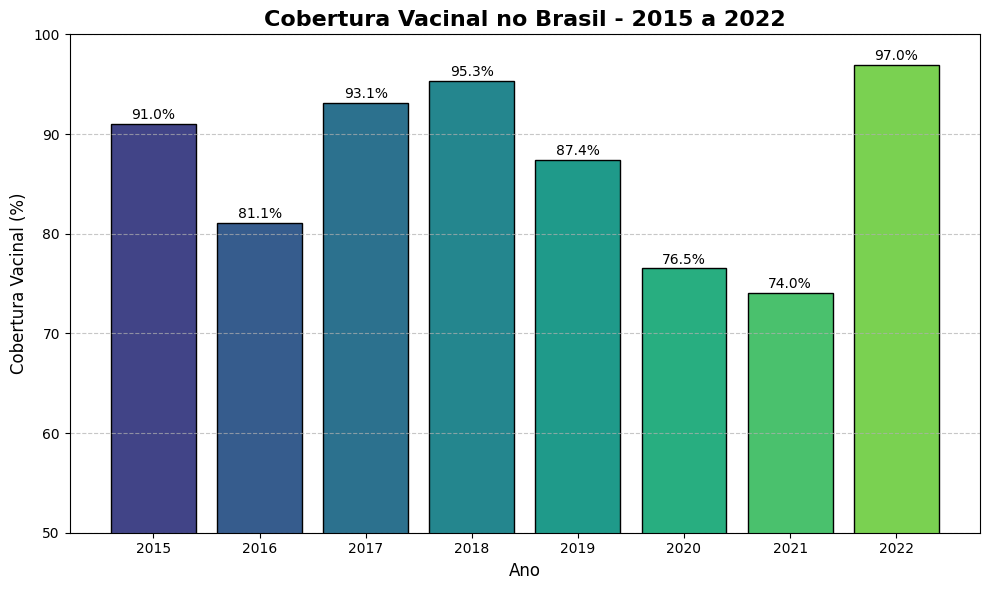

In [320]:
#Construindo gráficos para exemplificar

# Anos e cobertura vacinal média por ano
anos = ["2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]
cobertura_vacinal = df_combinado[["Cobertura Vacinal 2015", "Cobertura Vacinal 2016", "Cobertura Vacinal 2017", "Cobertura Vacinal 2018", "Cobertura Vacinal 2019", "Cobertura Vacinal 2020", "Cobertura Vacinal 2021", "Cobertura Vacinal 2022"]].mean()

#Definindo uma paleta de cores
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(anos)))  # Paleta de cores gradiente


# Configuração do gráfico de barras
plt.figure(figsize=(10, 6))

# Gráfico de barras com cores diferenciadas e bordas
bars = plt.bar(anos, cobertura_vacinal, color=colors, edgecolor='black')

# Título e rótulos
plt.title("Cobertura Vacinal no Brasil - 2015 a 2022", fontsize=16, fontweight='bold')
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Cobertura Vacinal (%)", fontsize=12)

# Adicionando grid para melhorar a visualização
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustando os limites do eixo y para melhorar a visibilidade
plt.ylim(50, 100)

# Exibir os valores nas barras
for i, valor in enumerate(cobertura_vacinal):
    plt.text(i, valor + 0.5, f'{valor:.1f}%', ha='center', fontsize=10)

# Exibição do gráfico
plt.tight_layout()
plt.show()


O resultado do teste estatístico indicou a existência de uma diferença significativa nos períodos antes (2015 a 2018) e depois das eleições (2019 a 2022).

Existem pontos interessantes a serem considerados:

- 1: fatores que podem influenciar na diferença percebida, mas não necessariamente alinhados ao posicionamento presidencial sobre vacinas;
- 2: houve uma queda considerável em 2019 (de 95,3% em 2018 para 87,4% em 2019) quando em comparação com o ano anterior, contudo, o mesmo ocorreu em 2016 (de 91,0% para 81,1%);
- 2: o próprio contexto pandêmico nos anos 2020 e 2021 que pode ter influenciado na queda na procura das pessoas por outras vacinas, como um movimento de resposta à necessidade de isolamento social;
- 3: houve um aumento ocorrido em 2022, sendo esse o ano com maior cobertura em comparação aos demais, o que pode ser um reflexo de procura por vacinação após decretado o fim da pandemia.

<div style="background-color: #e0e0e0; padding: 15px; border-radius: 8px;">

<h3 style="color:#333; font-size:20px; font-weight:bold; text-align:center;">
    Pergunta 2:
</h3>

<p style="font-size:16px; text-align:center; color:#444;">
    Há diferença significativa na cobertura vacinal do Brasil quando dividimos os municípios com base em quem foi o candidato eleito naquela região em 2018?
</p>

</div>

Da mesma forma como foi feito para a primeira questão, é interessante aplicar um teste estatístico para responder essa pergunta, mas dessa vez entre amostras independentes, ou seja, comparando municípios diferentes. Para isso foi utilizado o teste t Student, por haver 2 candidatos apenas, uma vez que foi considerado o segundo turno das eleições no Brasil.

- Hipótese nula (H0): Não há diferença significativa na cobertura vacinal entre os municípios com base no candidato eleito.
- Hipótese alternativa (H1): Há uma diferença significativa na cobertura vacinal entre os municípios com base no candidato eleito.

In [321]:
#Diferenciando os municípios de acordo com o candidato eleito em 2018

grupo_candidato_A = df_combinado[df_combinado["Nome candidato (2018)"] == "JAIR MESSIAS BOLSONARO"][['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018', 'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020', 'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']].mean(axis=1)

grupo_candidato_B = df_combinado[df_combinado['Nome candidato (2018)'] == 'FERNANDO HADDAD'][['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018', 'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020', 'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']].mean(axis=1)

# Teste t para amostras independentes (t Student)

#Para facilitar a interpretação dos resultados
stat, p_value = ttest_ind(grupo_candidato_A, grupo_candidato_B)

#Resultados
print(f"Resultado do Teste Estatístico (t Student): {stat:.4f}, p-valor: {p_value:.23f}")


#Considerando nível de significância de 5%
alpha = 0.05

if p_value < alpha:
    print(f"Rejeita-se a Hipótese Nula (H0), ou seja, há uma diferença significativa na cobertura vacinal considerando o candidato eleito (p-valor = {p_value:.4f})")
else:
    print(f"Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que o candidato eleito se relaciona com a cobertura vacinal (p-valor = {p_value:.4f})")



Resultado do Teste Estatístico (t Student): 9.5389, p-valor: 0.00000000000000000000210
Rejeita-se a Hipótese Nula (H0), ou seja, há uma diferença significativa na cobertura vacinal considerando o candidato eleito (p-valor = 0.0000)


O resultado do teste t Student indicou que há uma diferença significativa na cobertura vacinal quando considera-se o candidato eleito em 2018. Para visualizar melhor foi gerado o gráfico abaixo

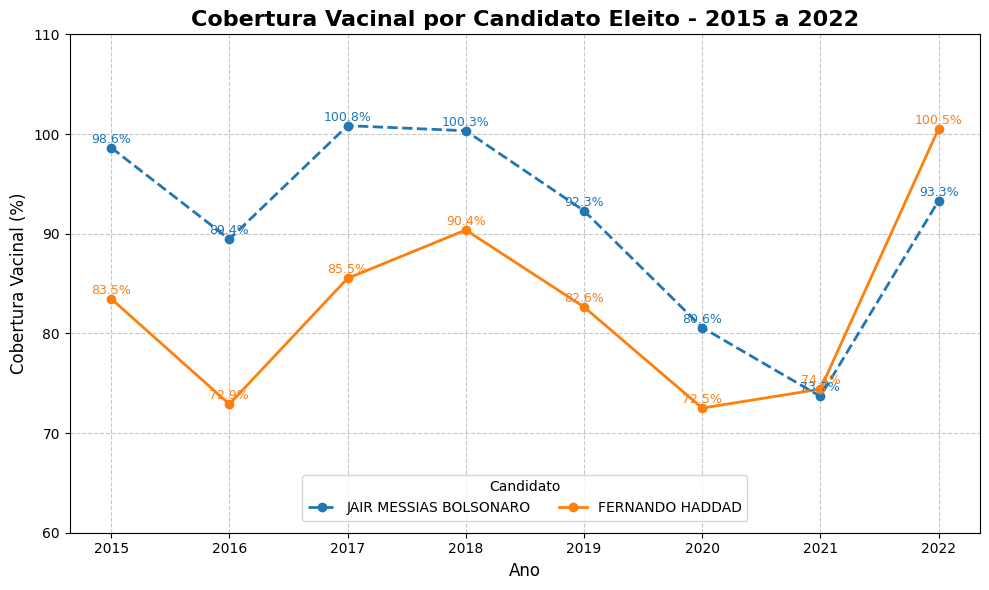

In [322]:
# Calculando a cobertura vacinal média ano a ano para cada grupo
media_candidato_A = df_combinado[df_combinado['Nome candidato (2018)'] == 'JAIR MESSIAS BOLSONARO'][['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018', 'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020', 'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']].mean()
media_candidato_B = df_combinado[df_combinado['Nome candidato (2018)'] == 'FERNANDO HADDAD'][['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018', 'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020', 'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']].mean()

anos = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Gráfico de linhas formatado
plt.figure(figsize=(10, 6))

# Linha para Candidato A
plt.plot(anos, media_candidato_A, label='JAIR MESSIAS BOLSONARO', marker='o', linestyle='--', color='#1f77b4', linewidth=2)

# Linha para Candidato B
plt.plot(anos, media_candidato_B, label='FERNANDO HADDAD', marker='o', linestyle='-', color='#ff7f0e', linewidth=2)

# Configurações de título e rótulos
plt.title('Cobertura Vacinal por Candidato Eleito - 2015 a 2022', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Cobertura Vacinal (%)', fontsize=12)

# Ajustando o limite do eixo y para acomodar valores maiores que 100
plt.ylim(60, 110)

# Adicionando grid e legendas
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Candidato', fontsize=10, loc='lower center', bbox_to_anchor=(0.5, 0.01), ncol=2)

# Garantir que as linhas do eixo x sejam visíveis
plt.xticks(anos)

# Exibir os valores nas linhas
for i, (valor_a, valor_b) in enumerate(zip(media_candidato_A, media_candidato_B)):
    plt.text(anos[i], valor_a + 0.5, f'{valor_a:.1f}%', ha='center', fontsize=9, color='#1f77b4')
    plt.text(anos[i], valor_b + 0.5, f'{valor_b:.1f}%', ha='center', fontsize=9, color='#ff7f0e')

# Melhor ajuste dos elementos gráficos
plt.tight_layout()

# Exibindo o gráfico
plt.show()

O gráfico gerado não permitiu identificar muita coisa, gerando resultados inconclusivos, uma vez que os municípios que elegeram o candidato Jair Messias Bolsonaro em 2018 apresentaram cobertura vacinal maior de 2015 a 2020, quando em comparação com os municípios que elegeram o candidato Fernando Haddad em 2018.

Cabem aqui duas observações. A primeira é sobre a cobertura vacinal superior a 100%. Isso se dá porque a cobertura vacinal é calculada com base no número de doses aplicada em relação ao número registrado ou estimado de pessoas alvo daquela vacina. Quando há discrepâncias nessa estimativa, pode ocorrer de ter-se mais doses aplicadas do que o número estimado de pessoas, ficando assim a cobertura vacinal acima de 100%.
A segunda observação é que a partir do ano de 2021 há uma inversão na cobertura vacinal, de modo que municípios que elegeram o candidato Jair Messias Bolsonaro em 2018 passam a ter uma cobertura vacinal menor do que municípios que elegeram o candidato Fernando Haddad em 2018.

Para analisar se o contexto político poderia explicar essa diferença, optou-se pela aplicação do teste de Diferenças em Diferenças (Difference-in-Differences ou DiD), que é um teste amplamente usado em contextos de análise de políticas públicas, economia, e outras ciências sociais para identificar efeitos causais de uma intervenção ou mudança de política. 

O DiD é uma técnica estatística usada para medir o impacto de uma intervenção ou evento (como uma eleição ou política pública) em dois grupos diferentes, comparando as diferenças em seus resultados antes e depois da intervenção. Essa abordagem é bastante útil em cenários onde você quer medir o impacto de um tratamento, especialmente em situações onde não é possível realizar um experimento controlado.


- Grupo de tratamento: é o grupo que foi exposto à intervenção (como a eleição de um candidato específico), nesse caso será composto pelos municípios que elegeram o candidato Jair Messias Bolsonaro em 2018.
- Grupo de controle: é o grupo que não foi exposto à intervenção (ou foi exposto a outro tipo de intervenção), nesse caso será composto pelos municípios que elegeram o candidato Fernando Haddad em 2018.

In [323]:
# Criando a variável pos_eleicao (0 para antes de 2018 e 1 para depois)
df_combinado['pos_eleicao'] = df_combinado['Ano de eleição (2018)'].apply(lambda x: 1 if x > 2018 else 0)

# Criando a variável grupo_tratamento (1 se o candidato eleito foi Bolsonaro, 0 para outros)
df_combinado['grupo_tratamento'] = df_combinado['Nome candidato (2018)'].apply(lambda x: 1 if x == 'JAIR MESSIAS BOLSONARO' else 0)

# Criando a interação Dif in Dif
df_combinado['dif_in_dif'] = df_combinado['pos_eleicao'] * df_combinado['grupo_tratamento']

# Calculando a cobertura vacinal média antes de 2018 (2015 a 2018)
df_combinado['Cobertura_Vacinal_Antes'] = df_combinado[['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016', 
                                                        'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018']].mean(axis=1)

# Calculando a cobertura vacinal média depois de 2018 (2019 a 2022)
df_combinado['Cobertura_Vacinal_Depois'] = df_combinado[['Cobertura Vacinal 2019', 'Cobertura Vacinal 2020', 
                                                         'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']].mean(axis=1)

# Criando uma variável dependente para usar na regressão
df_combinado['Cobertura_Vacinal'] = df_combinado[['Cobertura_Vacinal_Antes', 'Cobertura_Vacinal_Depois']].mean(axis=1)

import statsmodels.formula.api as smf

# Realizando a regressão Dif in Dif
modelo = smf.ols('Cobertura_Vacinal ~ pos_eleicao + grupo_tratamento + dif_in_dif', data=df_combinado).fit()

# Exibindo o resultado da variável de interação (dif_in_dif)
coef_dif_in_dif = modelo.params['dif_in_dif']
p_value_dif_in_dif = modelo.pvalues['dif_in_dif']

# Resultados
print(f"Resultado da Regressão Dif in Dif: coeficiente (dif_in_dif) = {coef_dif_in_dif:.4f}, p-valor = {p_value_dif_in_dif:.23f}")

# Considerando nível de significância de 5%
alpha = 0.05

if p_value_dif_in_dif < alpha:
    print(f"Rejeita-se a Hipótese Nula (H0), ou seja, há um impacto significativo do candidato eleito na cobertura vacinal (p-valor = {p_value_dif_in_dif:.4f})")
else:
    print(f"Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que o candidato eleito impacta a cobertura vacinal (p-valor = {p_value_dif_in_dif:.4f})")


Resultado da Regressão Dif in Dif: coeficiente (dif_in_dif) = 0.0000, p-valor = nan
Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que o candidato eleito impacta a cobertura vacinal (p-valor = nan)


Considerando a média da cobertura vacinal e as eleições 2018 não se chega a um resultado claro que indique que foram as eleições (ou o resultado das eleições) que implicaram nessa diferença que se percebe na cobertura vacinal dos municípios. Nesse contexto, pode-se ter influencia de outros fatores, como a própria pandemia em si.

Para "tirar os efeitos de pandemia" foi realizada uma análise parecida, porém considerando apenas os anos 2015 (primeiro ano após a eleição de 2014) e o ano de 2019 (primeiro ano após a eleição de 2018 e antes da pandemia).

In [324]:
# Criando a variável pos_eleicao (0 para antes de 2018 e 1 para depois)
df_combinado['pos_eleicao'] = df_combinado['Ano de eleição (2018)'].apply(lambda x: 1 if x >= 2019 else 0)

# Criando a variável grupo_tratamento (1 se o candidato eleito foi Bolsonaro, 0 para outros)
df_combinado['grupo_tratamento'] = df_combinado['Nome candidato (2018)'].apply(lambda x: 1 if x == 'JAIR MESSIAS BOLSONARO' else 0)

# Criando a interação Dif in Dif
df_combinado['dif_in_dif'] = df_combinado['pos_eleicao'] * df_combinado['grupo_tratamento']

# Utilizando apenas as coberturas vacinais de 2015 e 2019
df_combinado['Cobertura_Vacinal_Antes'] = df_combinado['Cobertura Vacinal 2015']
df_combinado['Cobertura_Vacinal_Depois'] = df_combinado['Cobertura Vacinal 2019']

# Criando uma variável dependente para a análise Dif-in-Dif, considerando apenas 2015 e 2019
df_combinado['Cobertura_Vacinal'] = df_combinado.apply(lambda row: row['Cobertura_Vacinal_Antes'] if row['pos_eleicao'] == 0 else row['Cobertura_Vacinal_Depois'], axis=1)

import statsmodels.formula.api as smf

# Realizando a regressão Dif in Dif
modelo = smf.ols('Cobertura_Vacinal ~ pos_eleicao + grupo_tratamento + dif_in_dif', data=df_combinado).fit()

# Exibindo o resultado da variável de interação (dif_in_dif)
coef_dif_in_dif = modelo.params['dif_in_dif']
p_value_dif_in_dif = modelo.pvalues['dif_in_dif']

# Resultados
print(f"Resultado da Regressão Dif in Dif: coeficiente (dif_in_dif) = {coef_dif_in_dif:.4f}, p-valor = {p_value_dif_in_dif:.4f}")

# Considerando nível de significância de 5%
alpha = 0.05

if p_value_dif_in_dif < alpha:
    print(f"Rejeita-se a Hipótese Nula (H0), ou seja, há um impacto significativo do candidato eleito na cobertura vacinal (p-valor = {p_value_dif_in_dif:.4f})")
else:
    print(f"Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que o candidato eleito impacta a cobertura vacinal (p-valor = {p_value_dif_in_dif:.4f})")


Resultado da Regressão Dif in Dif: coeficiente (dif_in_dif) = 0.0000, p-valor = nan
Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que o candidato eleito impacta a cobertura vacinal (p-valor = nan)


De igual maneira que para a média geral de todos os anos, mesmo nessa análise restrita que desconsidera os anos pandêmicos pós 2018, não há evidência estatística suficiente para afirmar que o candidato eleito em 2018 teve um impacto significativo na cobertira vacinal dos municípios brasileiros.

No entanto, ainda coube mais uma análise, considerando que, o posicionamento presidencial de Jair Messias Bolsonaro sobre vacinas ficou mais evidente justamente na época da pandemia. Como o que se busca entender aqui é se "a concordância com as ideias do referido candidato pode levar a uma busca menor por vacinas", uma outra análise a ser considerada é para com municípios que continuaram elegendo Jair Messias Bolsonaro nas eleições seguintes, ou seja, municípios em que a maioria da população possa estar de acordo com as ideias disseminadas pelo referido candidato.


<div style="background-color: #e0e0e0; padding: 15px; border-radius: 8px;">

<h3 style="color:#333; font-size:20px; font-weight:bold; text-align:center;">
    Pergunta 3:
</h3>

<p style="font-size:16px; text-align:center; color:#444;">
    Há diferença significativa na cobertura vacinal dos municípios brasileiros quando dividimos os municípios com base em quem foi o candidato eleito naquela região em 2022?
</p>

</div>

Para essa análise foi utilizada a regressão linear simples, que é uma técnica que modela a relação entre uma variável dependente (nesse caso a cobertura vacinal) e uma variável independente, ou seja, o candidato eleito em 2022

In [325]:
# Criando a variável grupo_tratamento (1 se o candidato eleito foi Bolsonaro em 2022, 0 para outros)
df_combinado['grupo_tratamento'] = df_combinado['Nome candidato (2022)'].apply(lambda x: 1 if x == 'JAIR MESSIAS BOLSONARO' else 0)

# Utilizando a cobertura vacinal de 2022 para análise
df_combinado['Cobertura_Vacinal_2022'] = df_combinado['Cobertura Vacinal 2022']

import statsmodels.formula.api as smf

# Realizando a regressão considerando apenas o grupo de tratamento
modelo = smf.ols('Cobertura_Vacinal_2022 ~ grupo_tratamento', data=df_combinado).fit()

# Exibindo o resultado da variável grupo_tratamento (candidatos de 2022)
coef_grupo_tratamento = modelo.params['grupo_tratamento']
p_value_grupo_tratamento = modelo.pvalues['grupo_tratamento']

# Resultados
print(f"Resultado da Regressão: coeficiente (grupo_tratamento) = {coef_grupo_tratamento:.4f}, p-valor = {p_value_grupo_tratamento:.4f}")

# Considerando nível de significância de 5%
alpha = 0.05

if p_value_grupo_tratamento < alpha:
    print(f"Rejeita-se a Hipótese Nula (H0), ou seja, há um impacto significativo do candidato eleito (Bolsonaro) na cobertura vacinal em 2022 (p-valor = {p_value_grupo_tratamento:.4f})")
else:
    print(f"Não se rejeita a Hipótese Nula (H0), ou seja, não há evidências suficientes para concluir que o candidato eleito (Bolsonaro) impacta a cobertura vacinal em 2022 (p-valor = {p_value_grupo_tratamento:.4f})")


Resultado da Regressão: coeficiente (grupo_tratamento) = -6.1090, p-valor = 0.0000
Rejeita-se a Hipótese Nula (H0), ou seja, há um impacto significativo do candidato eleito (Bolsonaro) na cobertura vacinal em 2022 (p-valor = 0.0000)


A aplicação da regressão linear simples indicou que os municípios que elegeram Bolsonaro em 2022 tiveram uma cobertura vacinal menor, em média, de 6,109 pontos percentuais nesse ano quando em relação aos municípios que elegeram outros candidatos.
A diferença é estatisticamente significativa, ou seja, não aconteceu por acaso, e pode-se concluir que o resultado da eleição, que nesse caso pode ser entendido como o alinhamento da população às ideias do candidato, teve um impacto real na cobertura vacinal.

<div style="background-color: #e0e0e0; padding: 15px; border-radius: 8px;">

<h3 style="color:#333; font-size:20px; font-weight:bold; text-align:center;">
    Pergunta 4:
</h3>

<p style="font-size:16px; text-align:center; color:#444;">
    No caso dos municípios que elegem Jair Messias Bolsonaro no primeiro turno de 2022, a cobertura vacinal sempre foi baixa ou, de fato, pode-se verificar uma queda que poderia estar associada à ampliação da divulgação do então presidente brasileiro sobre as vacinas?
</p>

</div>

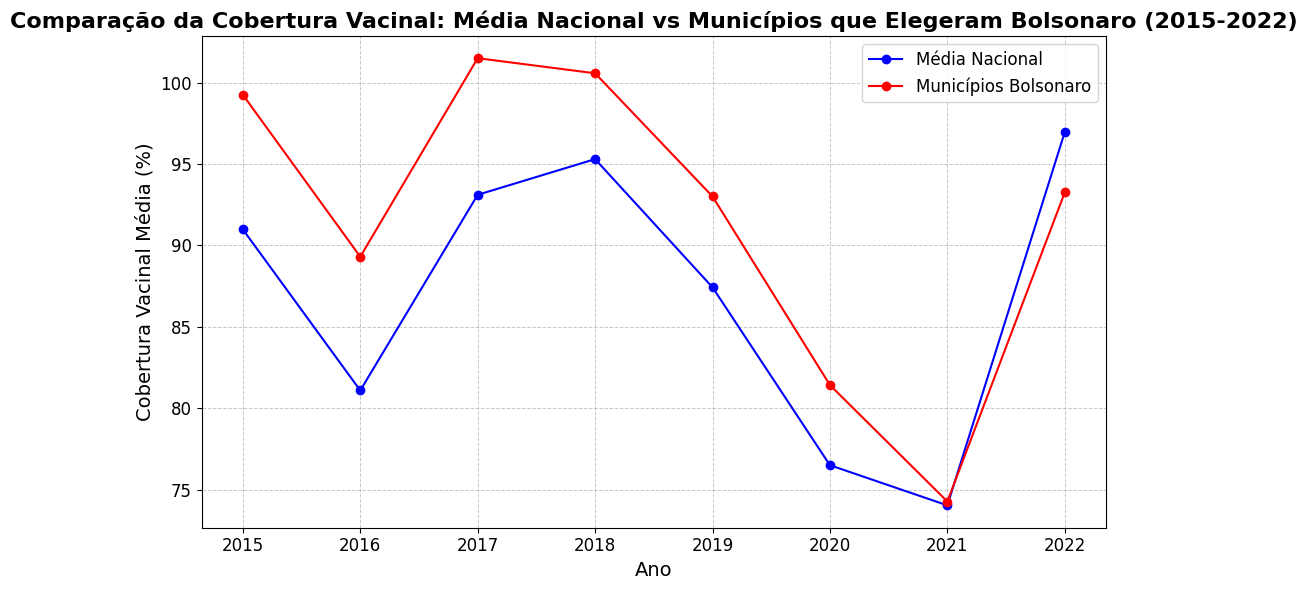

In [326]:

colunas_cobertura_vacinal = ['Cobertura Vacinal 2015', 'Cobertura Vacinal 2016',
       'Cobertura Vacinal 2017', 'Cobertura Vacinal 2018',
       'Cobertura Vacinal 2019', 'Cobertura Vacinal 2020',
       'Cobertura Vacinal 2021', 'Cobertura Vacinal 2022']

municipios_bolsonaro_2022 = df_combinado[df_combinado["Nome candidato (2022)"] == "JAIR MESSIAS BOLSONARO"]

# 1. Calcular a média de cobertura vacinal para todo o Brasil (considerando todos os municípios)
media_cobertura_nacional = df_combinado[colunas_cobertura_vacinal].mean()

# 2. Calcular a média da cobertura vacinal para os municípios que elegeram Bolsonaro em 2022
media_cobertura_bolsonaro = municipios_bolsonaro_2022[colunas_cobertura_vacinal].mean()


# 3. Criar uma lista de anos para o eixo X
anos = list(range(2015, 2022 + 1))

# 4. Plotar o gráfico comparando a média nacional com a média dos municípios que elegeram Bolsonaro
plt.figure(figsize=(10, 6))
plt.plot(anos, media_cobertura_nacional, marker='o', linestyle='-', color='blue', label='Média Nacional')
plt.plot(anos, media_cobertura_bolsonaro, marker='o', linestyle='-', color='red', label='Municípios Bolsonaro')

# 5. Personalizar o gráfico
plt.title('Comparação da Cobertura Vacinal: Média Nacional vs Municípios que Elegeram Bolsonaro (2015-2022)', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Cobertura Vacinal Média (%)', fontsize=14)
plt.xticks(anos, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.legend(fontsize=12)

# 6. Exibir o gráfico
plt.tight_layout()
plt.show()


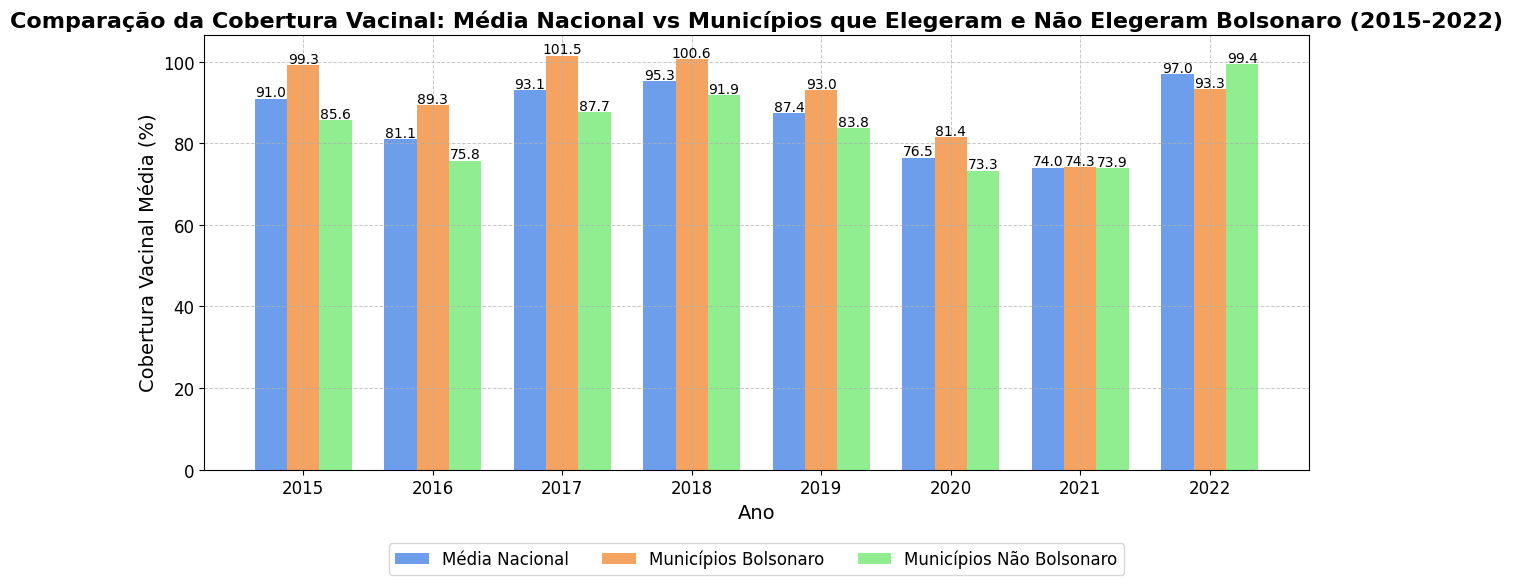

In [327]:
# 1. Calcular a média de cobertura vacinal para todo o Brasil (todos os municípios)
media_cobertura_nacional = df_combinado[colunas_cobertura_vacinal].mean()

# 2. Calcular a média da cobertura vacinal para os municípios que elegeram Bolsonaro em 2022
media_cobertura_bolsonaro = municipios_bolsonaro_2022[colunas_cobertura_vacinal].mean()

# 3. Filtrar os municípios que **não** elegeram Bolsonaro em 2022
municipios_nao_bolsonaro_2022 = df_combinado[df_combinado['Nome candidato (2022)'] != 'JAIR MESSIAS BOLSONARO']

# 4. Calcular a média da cobertura vacinal para os municípios que **não** elegeram Bolsonaro
media_cobertura_nao_bolsonaro = municipios_nao_bolsonaro_2022[colunas_cobertura_vacinal].mean()

# 5. Criar uma lista de anos para o eixo X
anos = list(range(2015, 2022 + 1))

# 6. Definir a posição das barras
bar_width = 0.25  # Largura das barras
indices = np.arange(len(anos))  # Posições no eixo X para as barras

# 7. Plotar o gráfico de barras lado a lado com três grupos
plt.figure(figsize=(12, 6))

# Barras da média nacional
bars_nacional = plt.bar(indices, media_cobertura_nacional, width=bar_width, color='#6D9EEB', label='Média Nacional')

# Barras da média dos municípios que elegeram Bolsonaro
bars_bolsonaro = plt.bar(indices + bar_width, media_cobertura_bolsonaro, width=bar_width, color='#F4A460', label='Municípios Bolsonaro')

# Barras da média dos municípios que **não** elegeram Bolsonaro
bars_nao_bolsonaro = plt.bar(indices + 2 * bar_width, media_cobertura_nao_bolsonaro, width=bar_width, color='#90EE90', label='Municípios Não Bolsonaro')

# 8. Adicionar rótulos com valores nas barras
for bars in [bars_nacional, bars_bolsonaro, bars_nao_bolsonaro]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.1f}', ha='center', fontsize=10)

# 9. Personalizar o gráfico
plt.title('Comparação da Cobertura Vacinal: Média Nacional vs Municípios que Elegeram e Não Elegeram Bolsonaro (2015-2022)', fontsize=16, fontweight='bold')
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Cobertura Vacinal Média (%)', fontsize=14)
plt.xticks(indices + bar_width, anos, fontsize=12)  # Ajustar os rótulos dos anos para ficarem no meio das barras
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

# 10. Colocar a legenda abaixo do eixo X
plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# 11. Exibir o gráfico
plt.tight_layout()
plt.show()


